In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/home/pcs/patrick/Dokumente/Github/colormap/"))
import colormaps as cmaps


In [2]:
import numpy as np
import scipy.constants as cs
import scipy.special as ss
from matplotlib import pyplot as plt
from matplotlib import cm
from qkit.qkit.gui.notebook.Progress_Bar import Progress_Bar as pb
from scipy.integrate import dblquad
from scipy import integrate

%matplotlib inline

In [3]:
#customized plots:
import matplotlib 
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
matplotlib.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (8.0,5.0)
matplotlib.rcParams['savefig.dpi'] = 200
matplotlib.rcParams['legend.shadow'] = True
matplotlib.rcParams['savefig.bbox'] = 'tight'


cmap_virdis = cmaps.viridis.colors


In [4]:
#matplotlib.rcParams

In [5]:
labelsize = 27

In [6]:
mu_0 = cs.mu_0
mu_B = cs.physical_constants['Bohr magneton'][0]   #Bohr magneton in SI units
k_b = cs.k

In [7]:
#number of squares: NxN
N = 16
l = 20.*10**(-9)
A = l**2./(N)**2.
deltax = deltay = l/(N) 

In [8]:
#z-position of the film plane
z = 10.*10**(-9.)

In [9]:
'''magnetic moment'''
mu = np.array([0,0,mu_B])


print r'magnetic moment: mu_s = (mu_x, mu_y, mu_z)/mu_B = {}'.format(mu/mu_B)

magnetic moment: mu_s = (mu_x, mu_y, mu_z)/mu_B = [ 0.  0.  1.]


## magnetic field dipol moment

In [10]:
def B_dipol(x,y,z, mu):
    '''magnetic flux densitiy B of a magnetic moment mu 
    vector representation'''
    
    #position of the single spin
    x_0 = 0.*10**(-9.)
    y_0 = 0.*10**(-9.)
    z_0 = 0.*10**(-9.)
    
    #spinposition:
    #print 'position of spin with respect to film plane: (x0,y0,z0) = {} nm'.format((x_0,y_0,z_0)*10**9)
    
    r = np.array([x-x_0,y-y_0,z-z_0])
    
    r_abs = np.linalg.norm(r)
    
    B_x = (3.*r[0]*np.dot(mu,r)/r_abs**(5.)-mu[0]/r_abs**(3.))
    B_y = (3.*r[1]*np.dot(mu,r)/r_abs**(5.)-mu[1]/r_abs**(3.))
    B_z = (3.*r[2]*np.dot(mu,r)/r_abs**(5.)-mu[2]/r_abs**(3.))
    
    return mu_0/(4.*np.pi)*np.array([B_x,B_y,B_z])
    

In [11]:
x_small = y_small = np.linspace(-l/2.,l/2.,N+1)
X_small, Y_small = np.meshgrid(x_small, y_small) 

In [12]:
x_Bz = y_Bz = np.linspace(-l/2.,l/2.,N)
X_Bz, Y_Bz = np.meshgrid(x_Bz, y_Bz) 

In [13]:
#magnetic dipol moment magnetic flux density components
B_x = B_dipol(X_Bz,Y_Bz,z, mu)[0] 
B_y = B_dipol(X_Bz,Y_Bz,z, mu)[1]
B_z = B_dipol(X_Bz,Y_Bz,z, mu)[2]

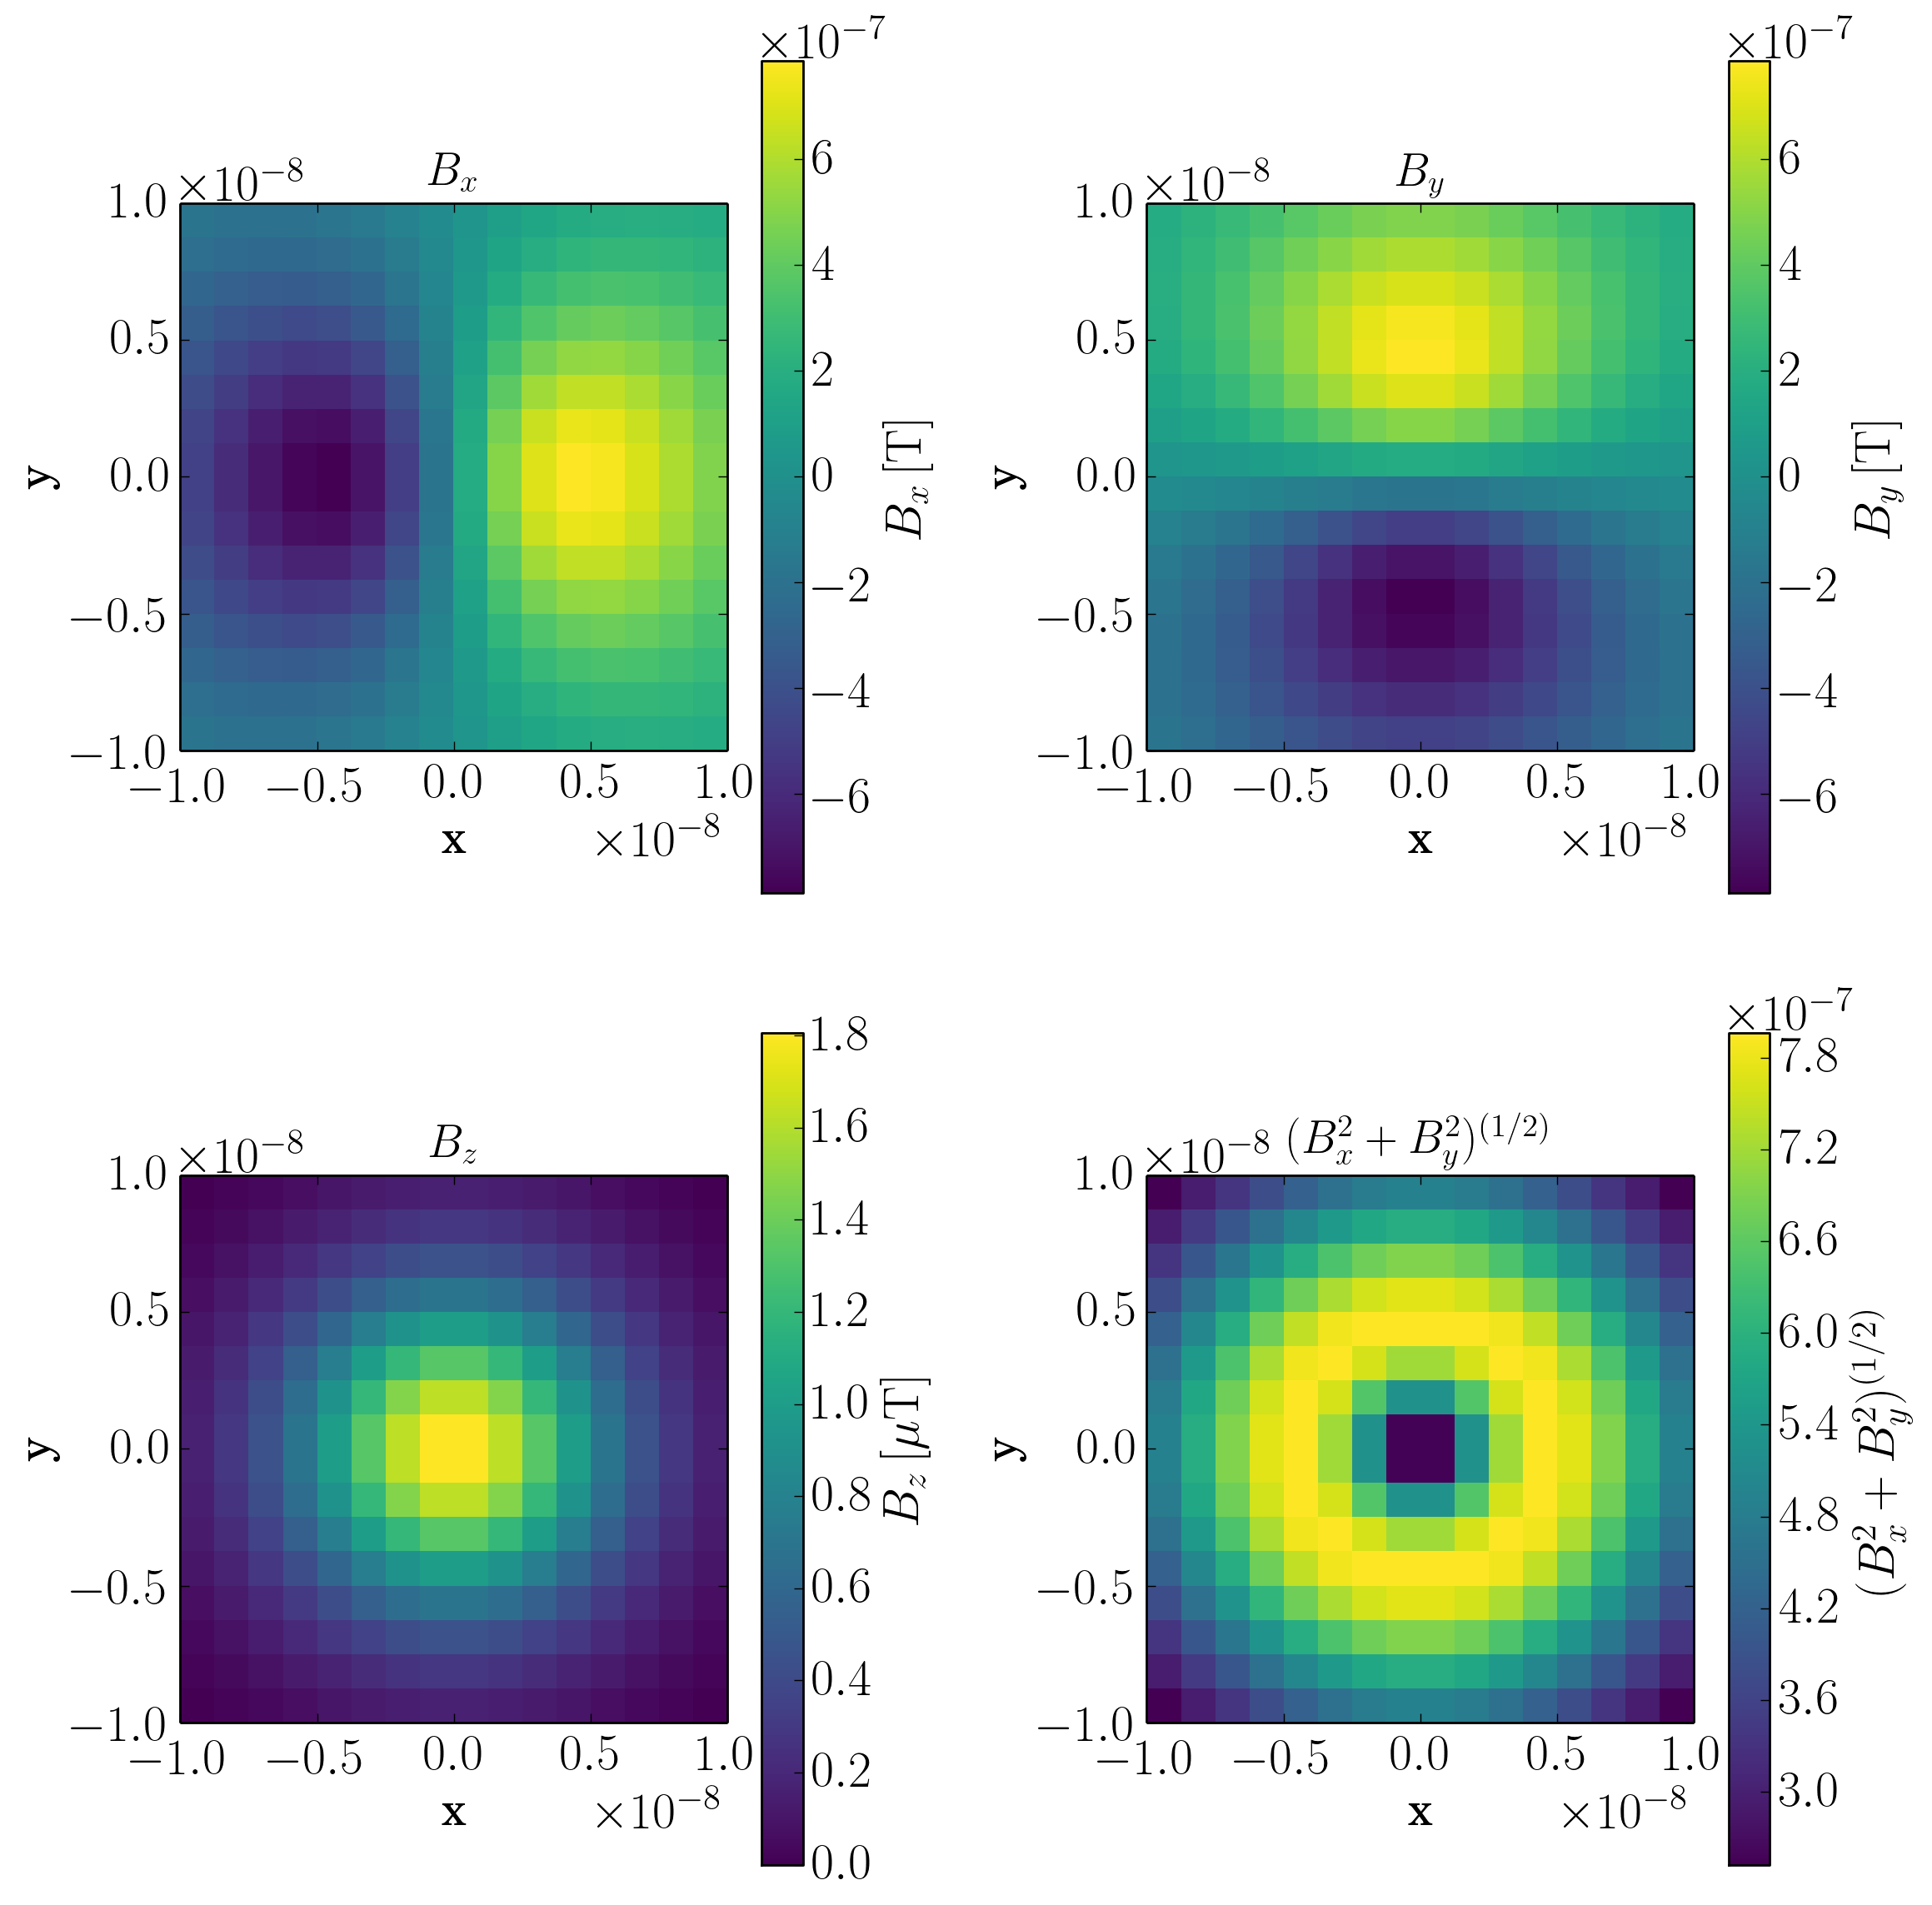

In [14]:
fig = plt.figure(figsize =(12,12))



fig1 = plt.subplot(221)
fig1.set_aspect('equal')
fig1.set_title(r'$B_x$', fontsize = 20)
fig1.set_xlabel('x', fontsize = 20)
fig1.set_ylabel('y', fontsize = 20)
cd = plt.pcolormesh(x_small,y_small,B_x, cmap=plt.get_cmap(cmaps.viridis))
cbar = plt.colorbar(cd)
cbar.ax.set_ylabel(r'$B_x\,\mathrm{[T]}$')
fig1.axes.set_xlim(-l/2,l/2)
fig1.axes.set_ylim(-l/2,l/2)

fig2 = plt.subplot(222)
fig2.set_aspect('equal')
fig2.set_title(r'$B_y$', fontsize = 20)
fig2.set_xlabel('x', fontsize = 20)
fig2.set_ylabel('y', fontsize = 20)
C2 = plt.pcolor(X_small,Y_small,B_y, cmap=plt.get_cmap(cmaps.viridis))
cb2 = plt.colorbar(C2)
cb2.ax.set_ylabel(r'$B_y\,\mathrm{[T]}$')
fig2.axes.set_xlim(-l/2,l/2)
fig2.axes.set_ylim(-l/2,l/2)

fig3 = plt.subplot(223)
fig3.set_aspect('equal')
fig3.set_title(r'$B_z$', fontsize = 20)
fig3.set_xlabel('x', fontsize = 20)
fig3.set_ylabel('y', fontsize = 20)
C3 = plt.pcolor(X_small,Y_small,B_z*10**6, cmap=plt.get_cmap(cmaps.viridis))
cb3 = plt.colorbar(C3)
cb3.ax.set_ylabel(r'$B_z\,\mathrm{[\mu T]}$')
fig3.axes.set_xlim(-l/2,l/2)
fig3.axes.set_ylim(-l/2,l/2)

fig4 = plt.subplot(224)
fig4.set_aspect('equal')
fig4.set_title(r'$(B_x^2 + B_y^2)^{(1/2)}$', fontsize = 20)
fig4.set_xlabel('x', fontsize = 20)
fig4.set_ylabel('y', fontsize = 20)
C4 = plt.pcolor(X_small,Y_small,np.sqrt(B_x**2. + B_y**2.), cmap=plt.get_cmap(cmaps.viridis))
cb = plt.colorbar(C4)
cb.ax.set_ylabel(r'$(B_x^2 + B_y^2)^{(1/2)}$')
fig4.axes.set_xlim(-l/2,l/2)
fig4.axes.set_ylim(-l/2,l/2)


plt.tight_layout()

In [15]:
#fig.savefig('single_magnet_magnetic_fields.png', dpi = 200)

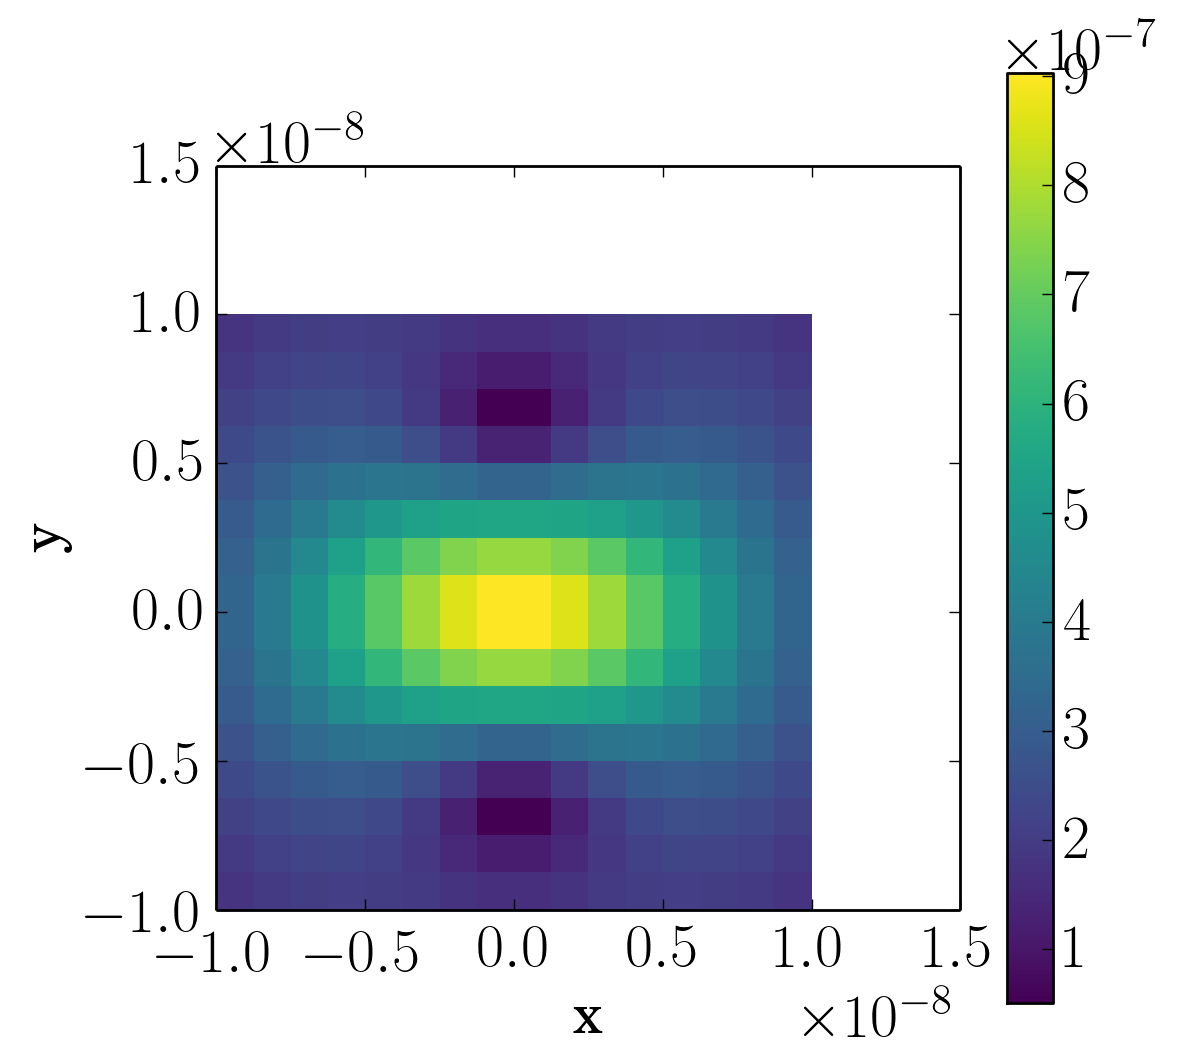

In [16]:
fig10, axes = plt.subplots(figsize =(6,6))
#axes.set_title(r'$B_z+B_x$', fontsize = 20)
axes.set_xlabel('x', fontsize = 20)
axes.set_ylabel('y', fontsize = 20)
axes.set_aspect('equal')
cd = plt.pcolor(X_small,Y_small,np.sqrt(B_dipol(X_Bz,z,Y_Bz, mu)[2]**2.+B_dipol(X_Bz,z,Y_Bz, mu)[0]**2.), cmap=plt.get_cmap(cmaps.viridis))
cbar = plt.colorbar(cd)
#cbar.ax.set_ylabel(r'$B_z^2+B_x^2$')




## out-of-plane componente magnetic field (dipole moment) + finite elemente

In [17]:
def B_dipol_z(x,y,z, mu):
    '''z component of the magnetic flux densitiy B of a magnetic moment mu'''
    
    x_0 = 0.*10**(-9.)
    y_0 = 0.*10**(-9.)
    z_0 = 0.*10**(-9.)
    
    r = np.array([x-x_0,y-y_0,z-z_0])
    
    r_abs = np.linalg.norm(r)
    
    B_z = (3.*r[2]*np.dot(mu,r)/r_abs**(5.)-mu[2]/r_abs**(3.))  #calculates only z-component
    
    return mu_0/(4.*np.pi)*B_z
    

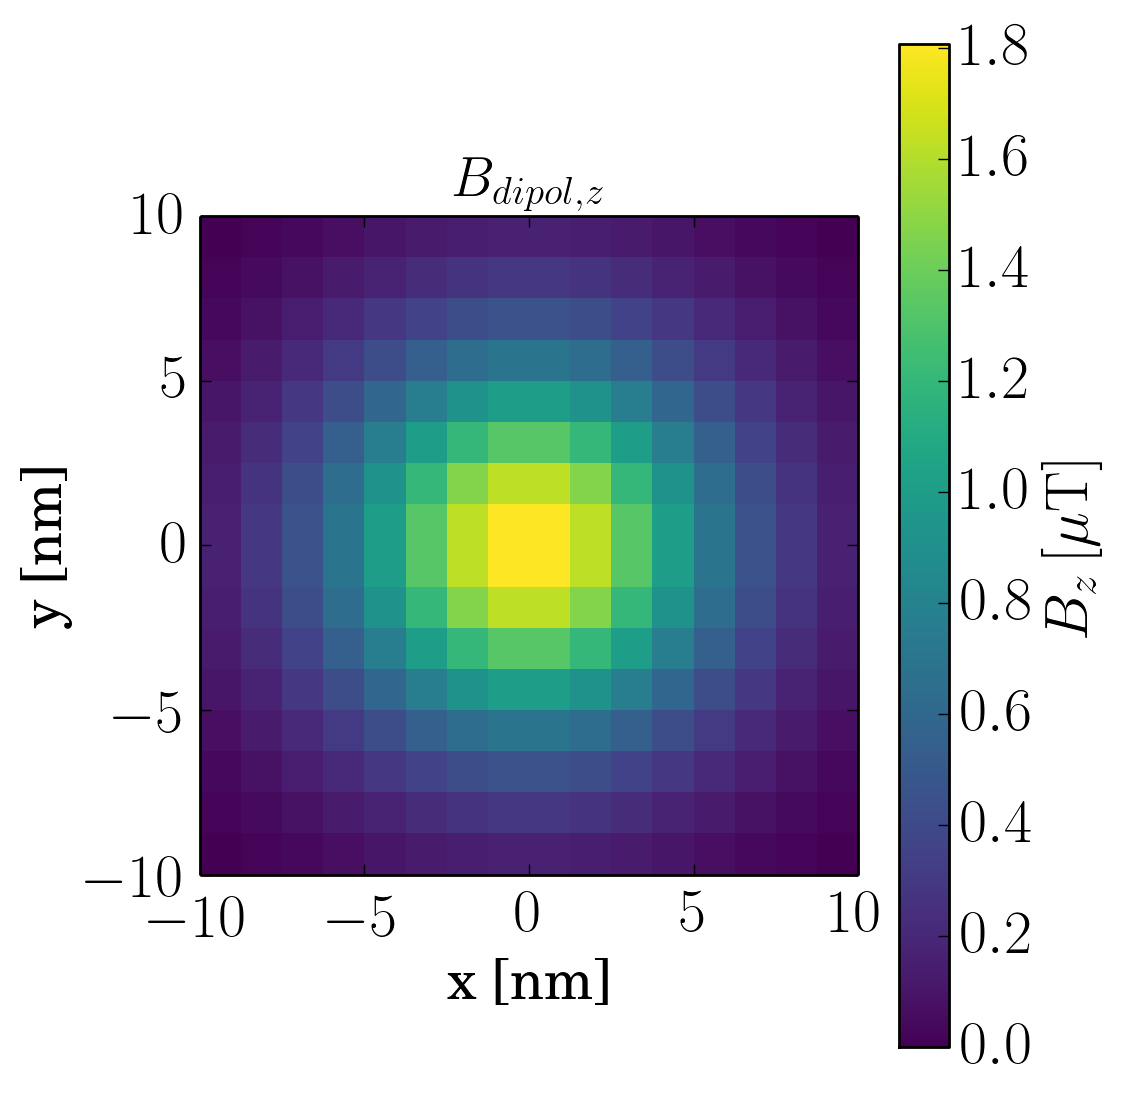

In [18]:
'''B_z calculated with function B_dipol_z'''
fig10, ax = plt.subplots(figsize =(6,6))
ax.set_title(r'$B_{dipol, z}$', fontsize = 20)
ax.set_xlabel('x [nm]', fontsize = 20)
ax.set_ylabel('y [nm]', fontsize = 20)
ax.axes.set_aspect('equal')
cd = plt.pcolor(x_small*10**9,y_small*10**9,B_dipol_z(X_Bz,Y_Bz,z,mu)*10**6, cmap=plt.get_cmap(cmaps.viridis))
cbar = plt.colorbar(cd)
cbar.ax.set_ylabel(r'$B_z\,\mathrm{[\mu T]}$')

plt.tight_layout()

In [19]:
#fig10.savefig('B_zspin.png', dpi = 200)

In [20]:
def B_ij_vec(i,j, z, mu):
    '''averaged z component of the magnetic field for the square i(column) j(row)
    magnetic flux is calculated as the surface integral of the magnetic flux densitiy
    and divided by the area A of the element'''
    #boundary values:
    x_low = -l/2. + (i)*deltax
    x_high = -l/2. + (i+1)*deltax
    y_low = -l/2. + (j)*deltax
    y_high = -l/2. + (j+1)*deltax
    
    B_mean = (1./A)*integrate.nquad(B_dipol_z,[[x_low,x_high],[y_low,y_high]], args=(z,mu))[0] 
    return B_mean

In [21]:
'''B_spin as NxN matrix'''
B_tot_vec = []
for i in range(N):
    B = []
    for j in range(N):
        B.append(B_ij_vec(i,j, z, mu))
    B_tot_vec.append(B)    
B_tot_vec = np.array(B_tot_vec)
B_tot_vec.shape

(16, 16)

In [22]:
#magnetic field distribution of the magnetic moment mu_s
H_tot_vec = B_tot_vec/mu_0  

## critical magnetic field (H_c and B_c)

In [23]:
T_c0 = 2. #ciritcal temperature at zero temperature and zero magnetic field
Hc_CGS = 1.76*k_b*T_c0/(np.sqrt(2.)*mu_B)
print 'critical magentic field H_c in cgs units: H_c  = {} T'.format(Hc_CGS)

Bc_SI = Hc_CGS  #due to the transformation between cgs and SI units. Hc gets replaced by Bc in
                #the Ginzburg-Landau theory and the free-energy, respectively

Hc_SI = Bc_SI/mu_0

print


print 'critical magentic field H_c in SI units: H_c  = {} T'.format(Hc_SI)

H_c = Hc_SI

critical magentic field H_c in cgs units: H_c  = 3.70547033307 T

critical magentic field H_c in SI units: H_c  = 2948719.59995 T


## kinetic inductance vs. magnetic field

In [24]:
def L_kin(H, H_c):
    '''inductance as a function of the magnetic field
    with critical field H_c and linear dependence bewteen alpha and H'''
    L_K = 1.    #since L_K = 1., L_kin is normalized to the kinetic inductance at zero magnetic field
    return L_K/(1.-np.abs(H)/H_c)

In [26]:
def L_KTFM(H, H_c):
    '''inductance as a function of the applied magnetic field
    in the two-fluid-model'''
    L_K = 1.
    return L_K*np.sqrt((1.+np.abs(H)/H_c)/(1-np.abs(H)/H_c))


In [27]:
#static magnetic field values

H = np.linspace(-H_c,H_c,1000)

H1 = np.arange(0,H_c,H_c/50)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


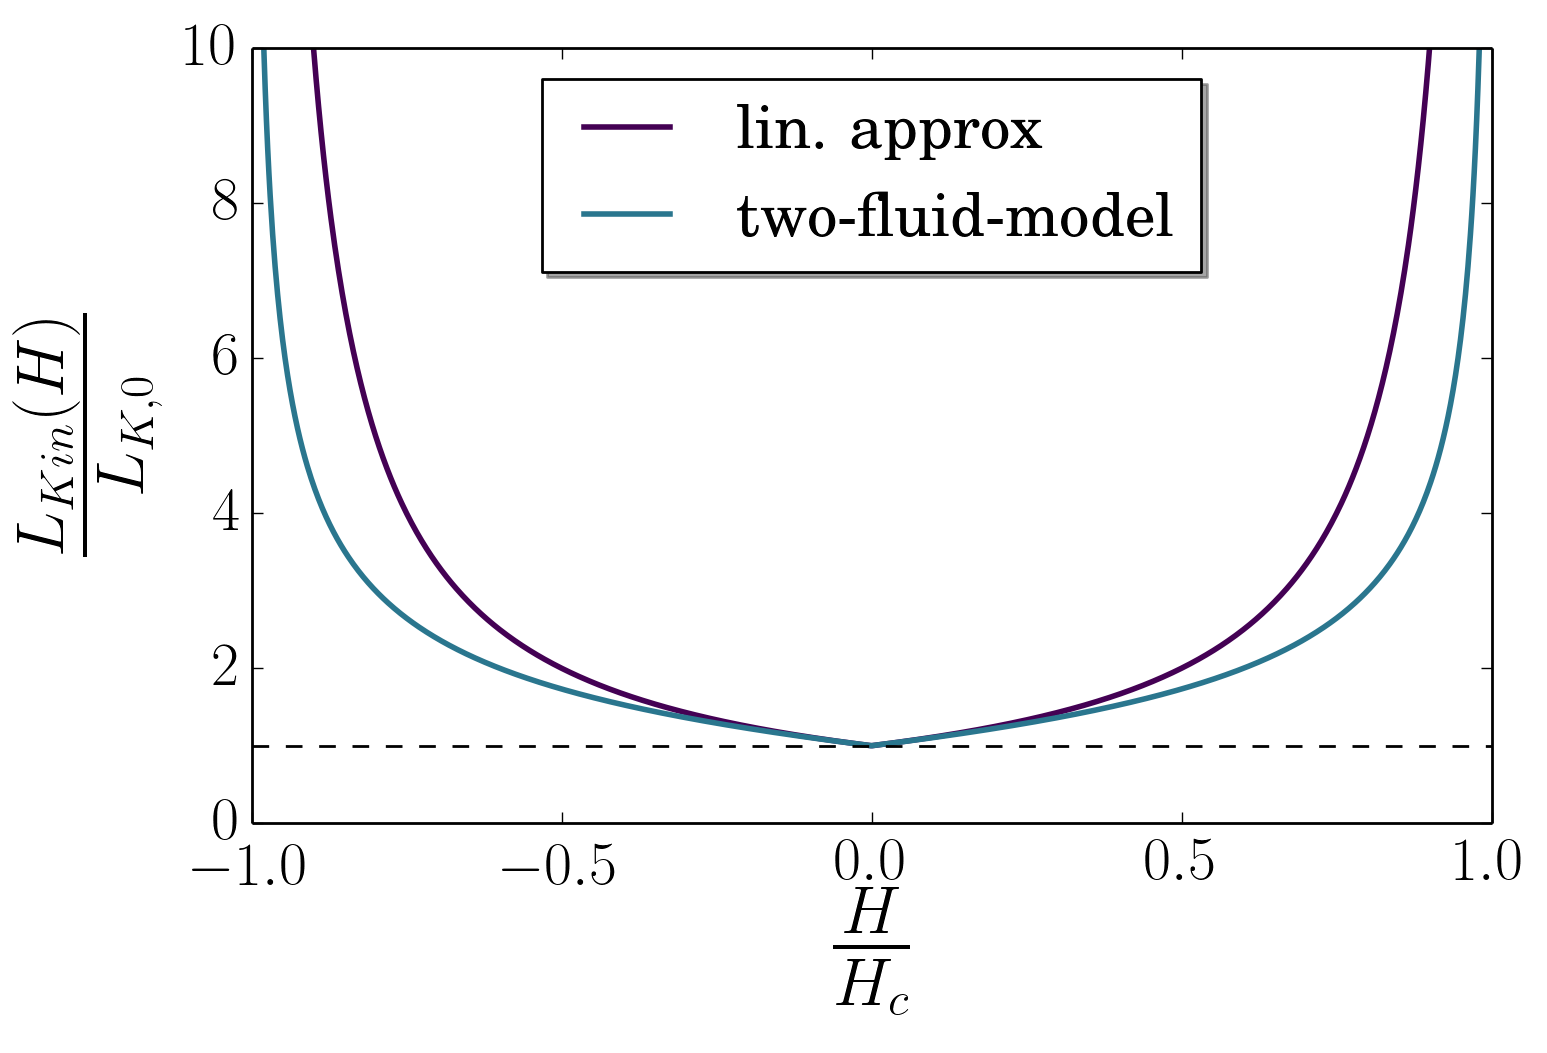

In [30]:
fig_L1 = plt.figure(figsize =(8,5))
plt.plot(H/H_c,L_kin(H, H_c), label = 'lin. approx', lw = 2, color = cmap_virdis[0])
plt.plot(H/H_c,L_KTFM(H, H_c), label = 'two-fluid-model', lw = 2, color = cmap_virdis[100])
#plt.plot(H1/H_c,L_kin(H1, H_c))
plt.xlabel(r'$\frac{H}{H_c}$', fontsize = 35)
plt.ylabel(r'$\frac{L_{Kin} (H)}{L_{K,0}}$', fontsize = 35)
plt.ylim(0,10)
plt.axhline(1, ls = '--', color = 'black')
plt.legend(fontsize = 22, loc = 'upper center')

In [32]:
#fig_L1.savefig('L_kin(H).png')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


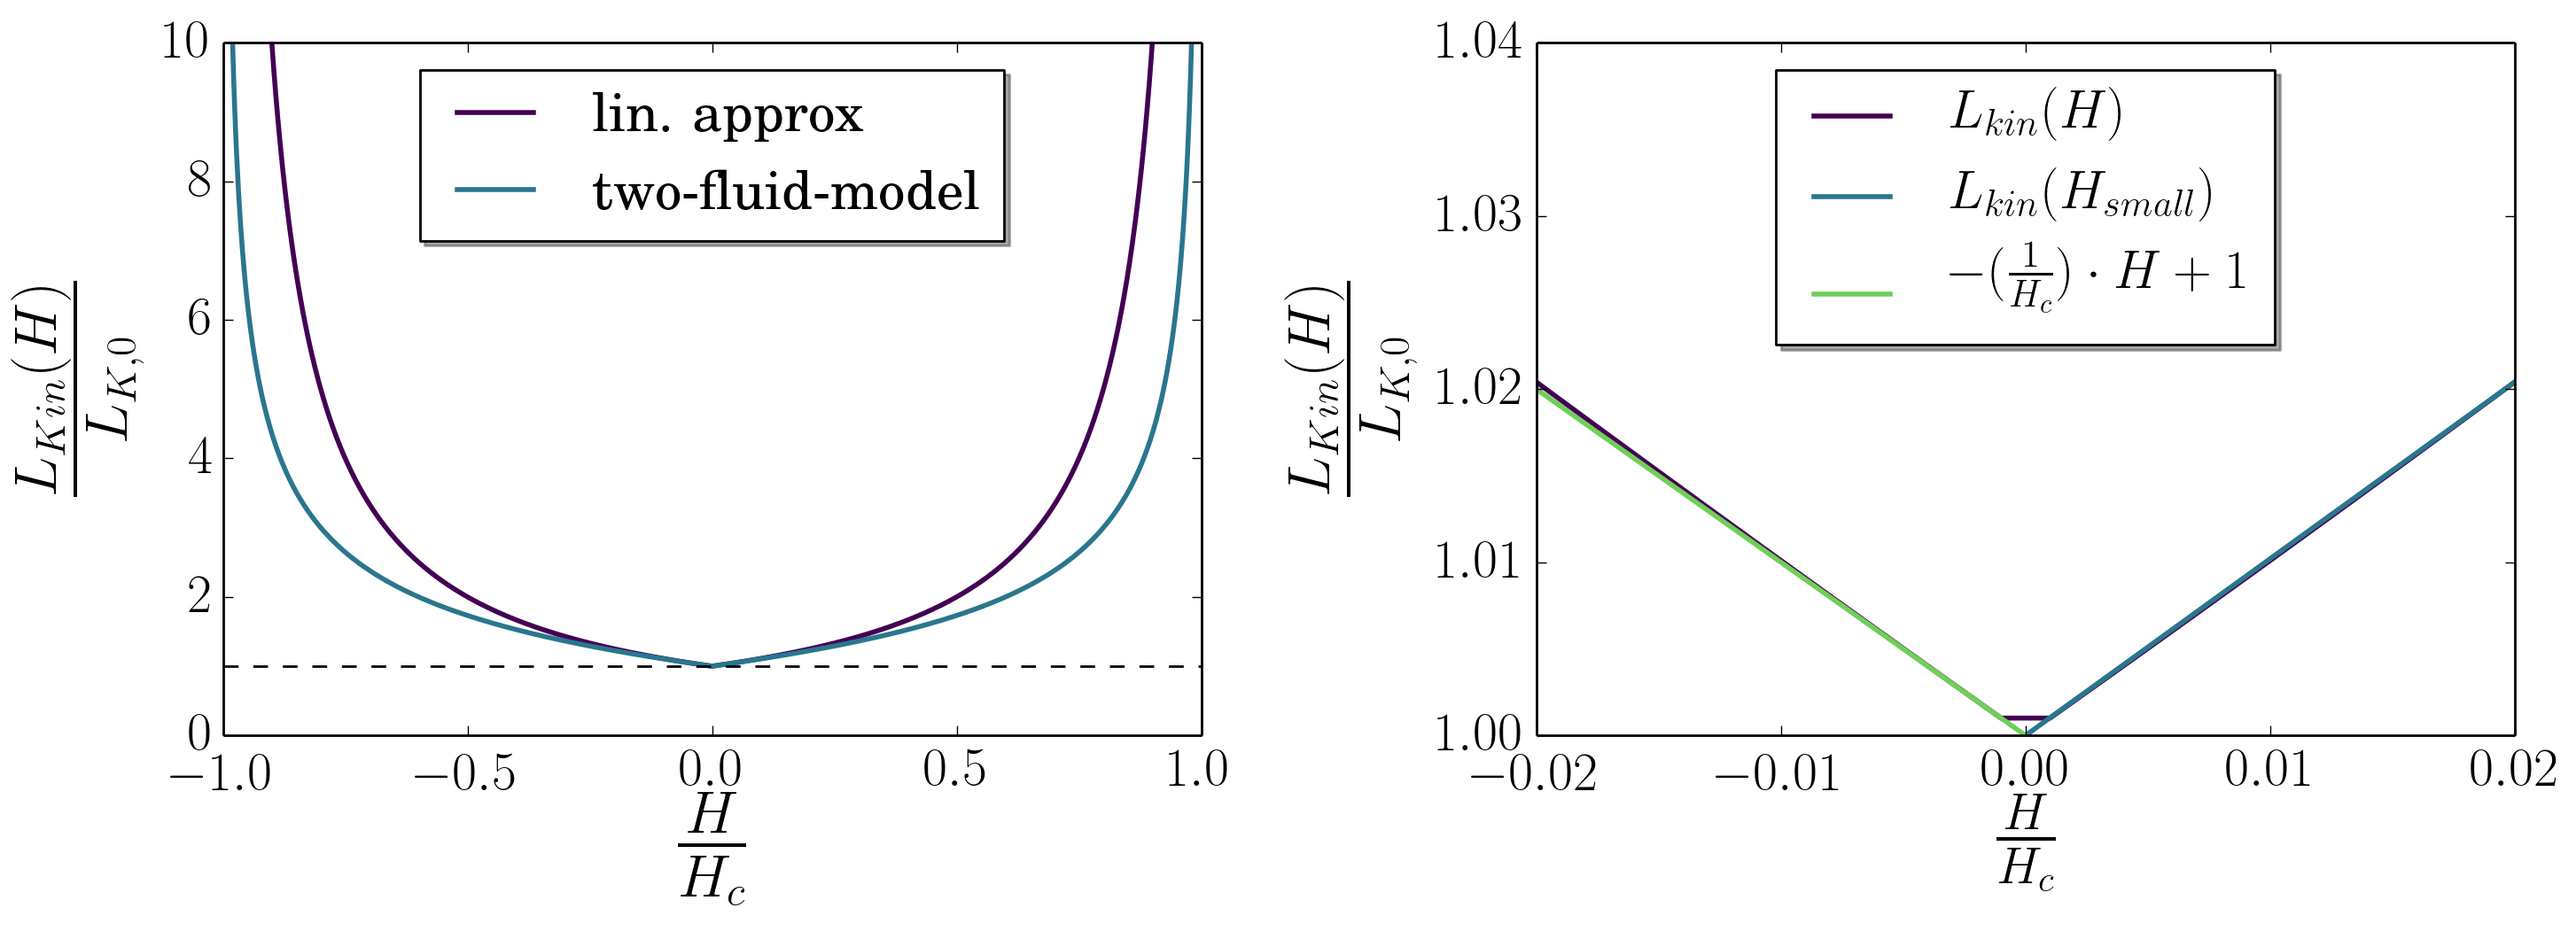

In [27]:
fig_Lzoom = plt.figure(figsize =(15,10))

fig_Lzoom1 = plt.subplot(221)
plt.plot(H/H_c,L_kin(H, H_c), label = 'lin. approx', lw = 2, color = cmap_virdis[0])
plt.plot(H/H_c,L_KTFM(H, H_c), label = 'two-fluid-model', lw = 2, color = cmap_virdis[100])
#plt.plot(H1/H_c,L_kin(H1, H_c))
plt.xlabel(r'$\frac{H}{H_c}$', fontsize = 35)
plt.ylabel(r'$\frac{L_{Kin} (H)}{L_{K,0}}$', fontsize = 35)
plt.ylim(0,10)
plt.axhline(1, ls = '--', color = 'black')
plt.legend(fontsize = 22, loc = 'upper center')


fig_Lzoom1 = plt.subplot(222)
plt.plot(H/H_c,L_kin(H, H_c), label = r'$L_{kin}(H)$', lw = 2, color = cmap_virdis[0]  )
plt.plot(H1/H_c,L_kin(H1, H_c), label = r'$L_{kin}(H_{small})$',lw = 2, color = cmap_virdis[100]  )
plt.plot(H/H_c,(-1./H_c)*H+1, label = r'$-(\frac{1}{H_c})\cdot H+1$', lw = 2, color = cmap_virdis[200]  )
plt.xlabel(r'$\frac{H}{H_c}$', fontsize = 30)
plt.ylabel(r'$\frac{L_{Kin} (H)}{L_{K,0}}$', fontsize = 35)
plt.ylim(1,1.04)
plt.xlim(-0.02,0.02)
plt.xticks([-0.02,-0.01,0,0.01, 0.02])
plt.yticks([1.0, 1.01,1.02, 1.03, 1.04])
plt.legend(fontsize = 22, loc = 'upper center')

plt.tight_layout()


In [33]:
fig_Lzoom.savefig('L_kin(H)_zoom.png')

In [25]:

L_kin(0,H_c)

1.0

## resonance frequency vs. magnetic field

In [69]:
def f_r(H, H_c):
    '''resonance frequency as a function of the applied magnetic field'''
    fr = np.sqrt(1.-np.abs(H)/H_c)
    return fr

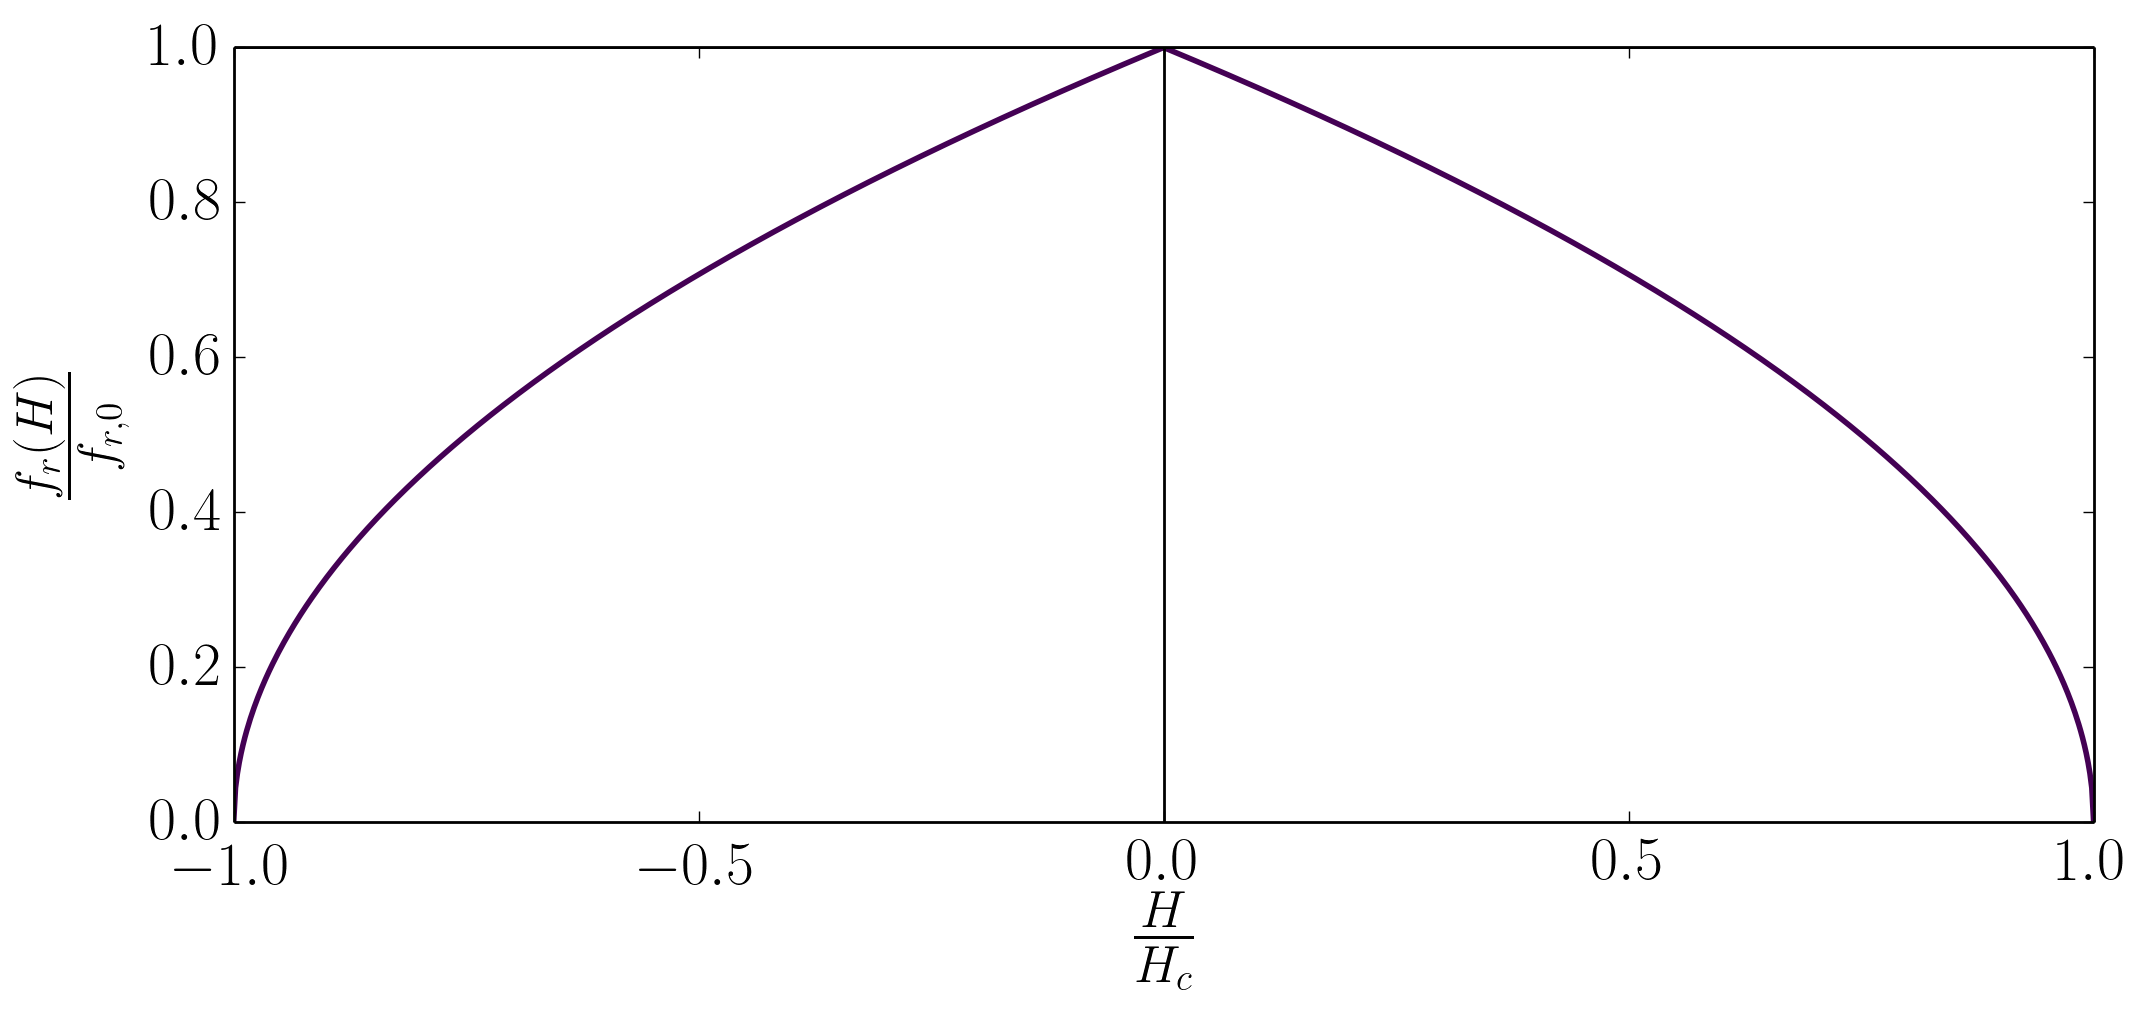

In [165]:
fig_fres = plt.figure(figsize=(12,5))

#plt.subplots(figsize = (12,5))
plt.plot(H/H_c, f_r(H, H_c), lw = 2, color = cmap_virdis[0])
plt.xlabel(r'$\frac{H}{H_c}$', fontsize = labelsize)
plt.ylabel(r'$\frac{f_{r}(H)}{f_{r,0}}$', fontsize = labelsize)
plt.axvline(0, color = 'black')
plt.axhline(1, color = 'black')

In [166]:
fig_fres.savefig('f_res(H).png')

## calculations for different values for the static magnetic fields

In [72]:
def H_3D(N,H_ext, H_spin):
    '''function creates a 3D array with len(H_ext) NxN matrices
    H_ext is a 1D-vector with different entries for the applied static magnetic field H0
    H_spin corresponds to the spin's magnetic field (NxN)-matrix'''
    
    #case analysis: homogeneous magnetic field vs. gradient field
    
    if ((type(H_spin) is int) == True):
        H_s = np.zeros([N,N])   #matrix of size (NxN) with zeros -> no spin magnetic field
    else:
        H_s = H_spin
        
    #calculation of H-matrix     
    H_mat = []
    for H0 in H_ext:  #loop over every single static magnetic field value H0
        B1 = []       
        for i in range(N):  #sum over all rows 
            B11 = []
            for j in range(N):  #sum over all colums
                B11.append(H0+H_s[i][j])  
            B1.append(B11)
        B1 = np.array(B1)
        H_mat.append(B1) 
    return H_mat

In [73]:
H_mat = np.array(H_3D(N,H,0))
H_mat.shape

(1000, 16, 16)

In [74]:
def L_tot_v(N,H, H_c):
    '''total kinetic inductance in dependence of the spins 
    magnetic field (H_spin) and an external static field H0:
    H = H_spin + H0
    single inductive elements are treated as a series circuit
    in x-direction and a parallel circuit in y-direction'''
    L_t = []
    p1 = pb(len(H))
    for k in range((H).shape[0]): #loop over different values for the static magnetic field H0
        l_tot = 0
        L_total = 0.
        for j in range(N): #sum over column (y-direction)
            L_row = 0.
            for i in range(N):  #sum over row (x-direction)
                    L_row += L_kin(H, H_c)[k][i][j]
            l_tot += 1./L_row
        L_total = 1./l_tot
        L_t.append(L_total)
        p1.iterate()
    return L_t

(1, 10)

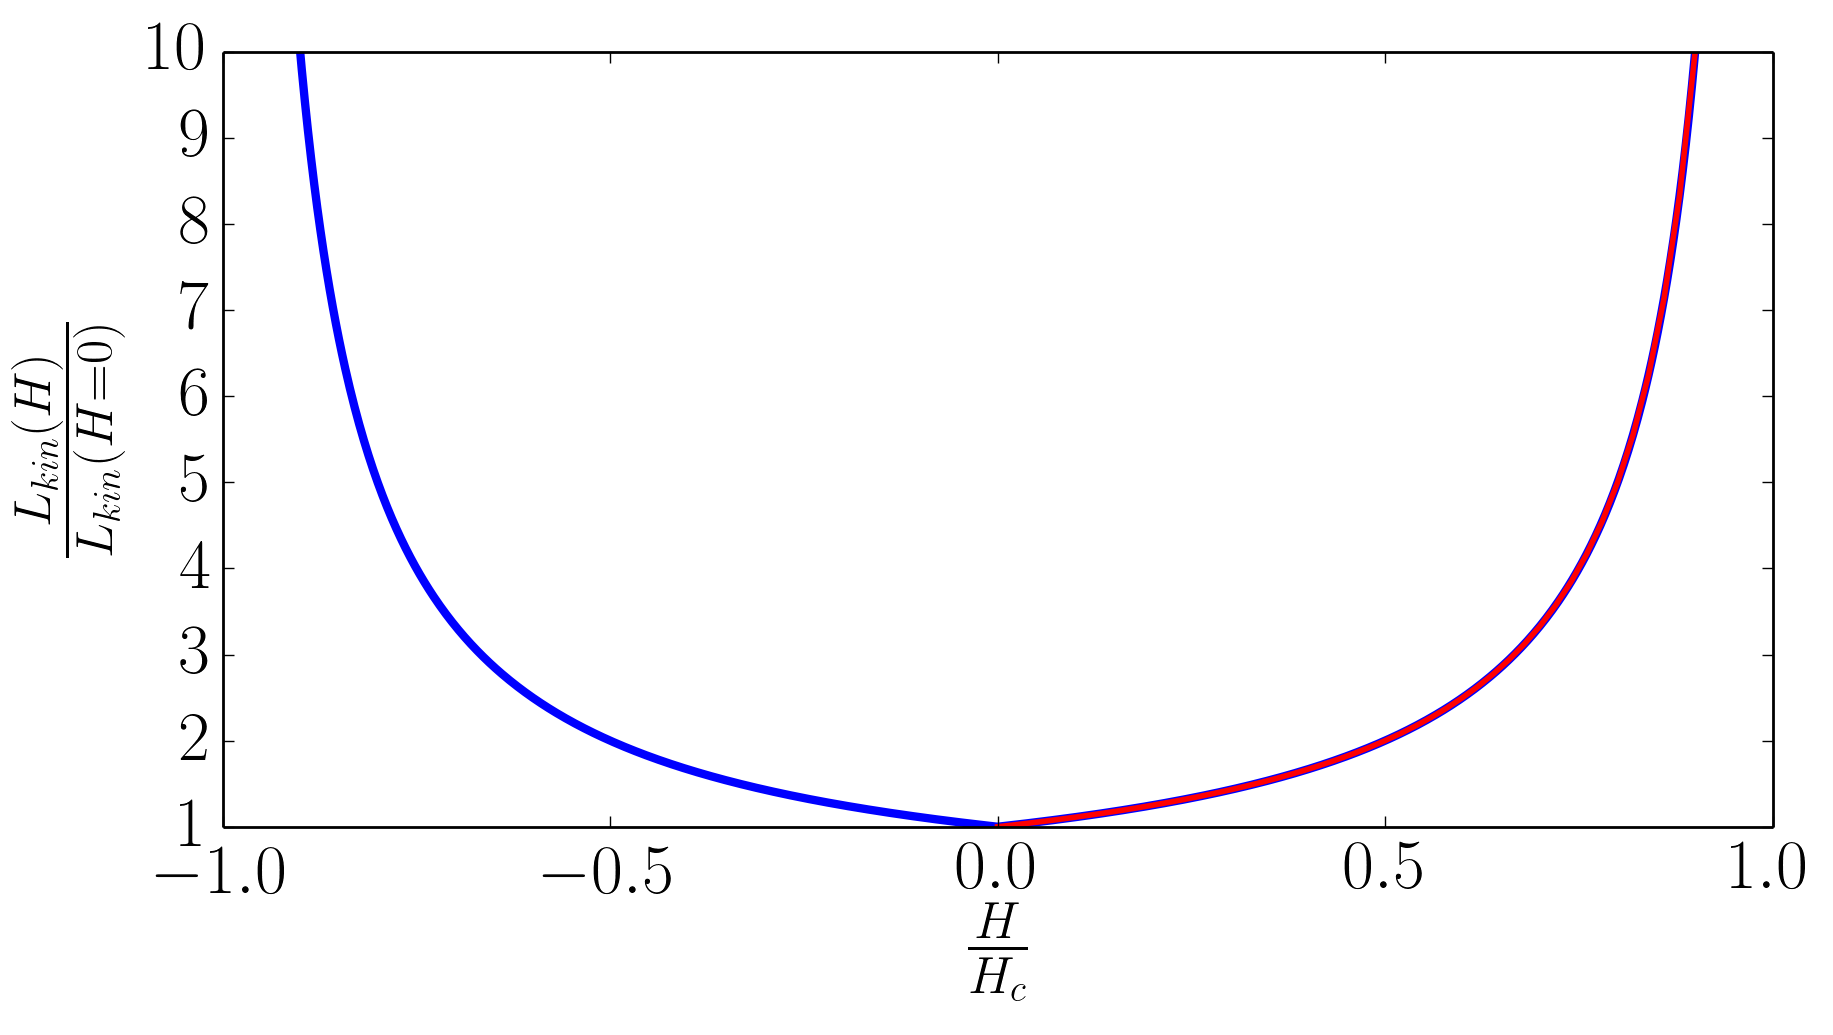

In [75]:
'''comparison between the kinetic inductance as a function of the magnetic field L_K(H) 
and the total inductance L_tot(H) calculated by splitting the area into NxN squares and adding the single
elements taking Kirchhoff's circuit laws into account '''
plt.subplots(figsize = (10,5))
plt.plot(H/H_c, L_kin(H, H_c), lw = 3)
plt.plot(H1/H_c,  L_tot_v(10, np.array(H_3D(10,H1,0)), H_c), lw = 2, color = 'red')
plt.xlabel(r'$\frac{H}{H_c}$', fontsize = labelsize)
plt.ylabel(r'$\frac{L_{kin} (H)}{L_{kin} (H = 0)}$', fontsize = labelsize)
plt.ylim(1,10)

In [76]:
#static magnetic field
N_H0 = 200 #number of steps
H_max = 0.99*H_c #maximum external magnetic field

H_stat = np.linspace(0,H_max,N_H0)

In [77]:
H_plus_vec = np.array(H_3D(N,np.array(H_stat),np.array(H_tot_vec)))  #spin up
H_minus_vec = np.array(H_3D(N,np.array(H_stat),-np.array(H_tot_vec))) #spin down

In [78]:
#kinetic inductance: spin up and spin down
L_plus = np.array(L_tot_v(N,H_plus_vec, H_c))
L_minus = np.array(L_tot_v(N,H_minus_vec, H_c))

In [79]:
#kinetic inductance in homogeneous magnetic field
L_0 = L_tot_v(N,np.array(H_3D(N,H_stat,0)), H_c)

In [80]:
#difference of the inductance between the two spin states:
deltaL1 = L_plus - L_minus

In [81]:
L_plus[0]-L_0[0]

1.4449860885612509e-07

In [82]:
r = 1
print L_plus[r+1]-L_plus[r]
print L_minus[r+1]-L_minus[r]

0.00504999512595
0.00504999218512


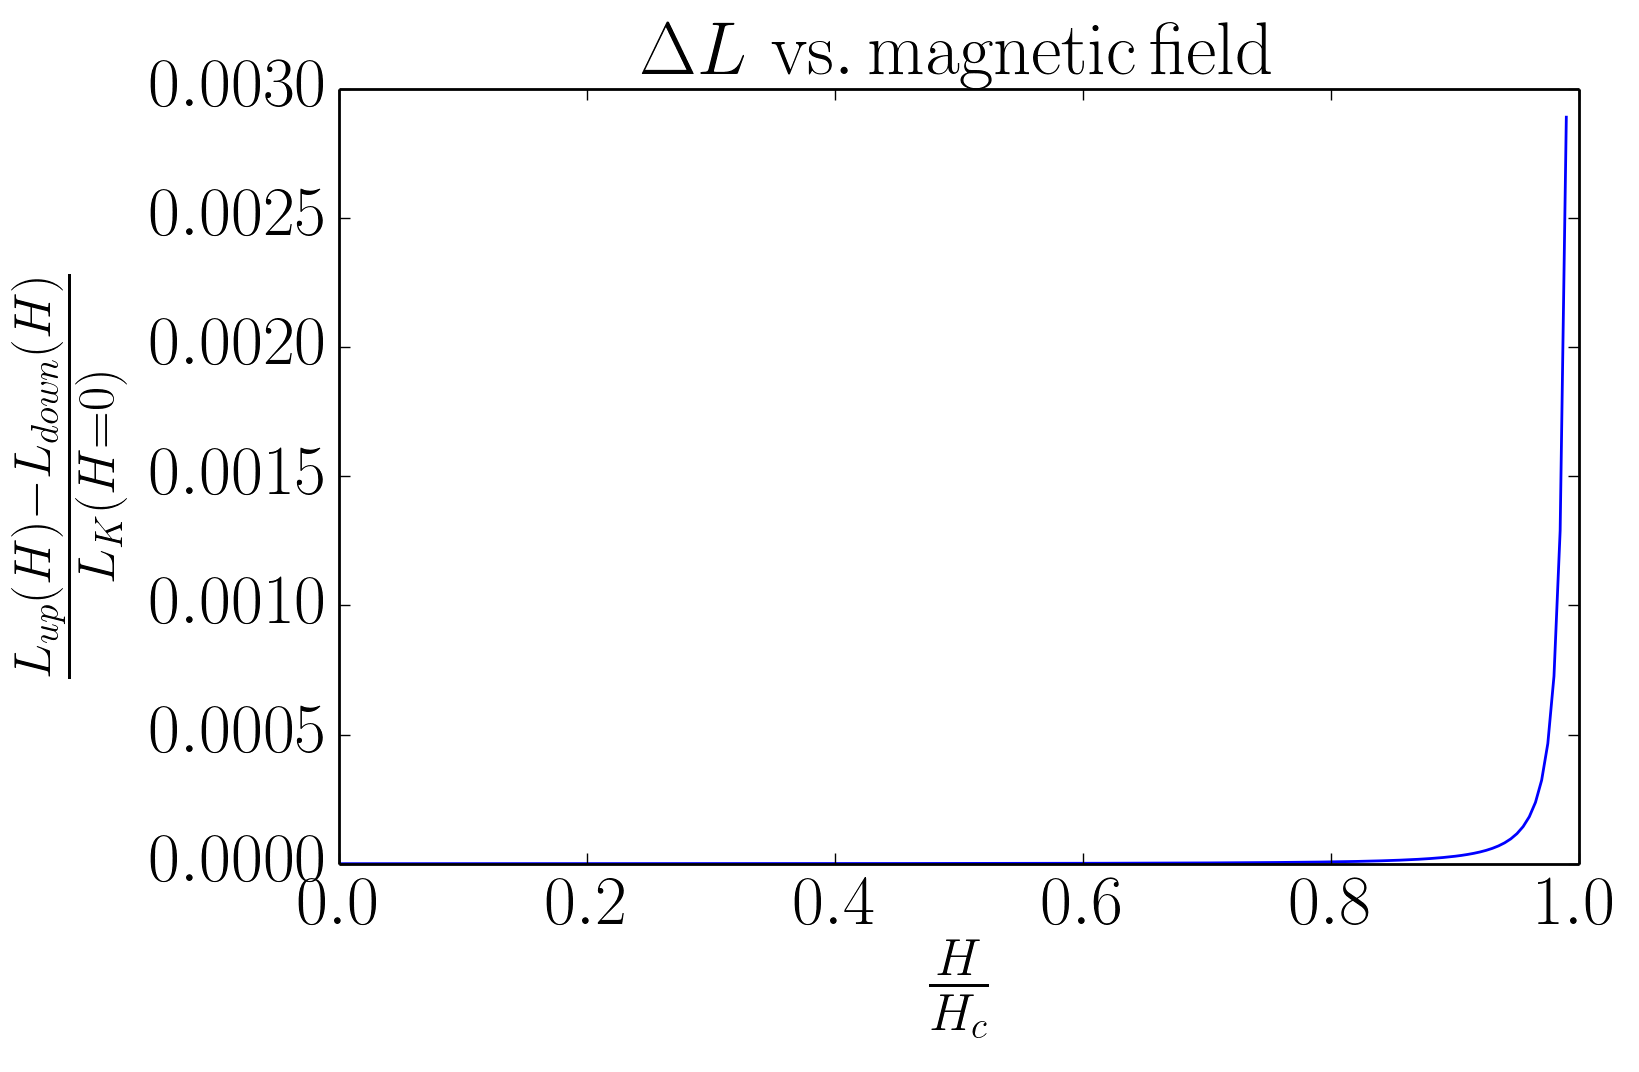

In [83]:
plt.subplots(figsize = (8,5))
plt.plot(H_stat/H_c, deltaL1)
plt.title(r'$\Delta L\,\mathrm{\,vs.\,magnetic\,field}$', fontsize = labelsize)
plt.xlabel(r'$\frac{H}{H_c}$', fontsize = labelsize)
plt.ylabel(r'$\frac{L_{up}(H) - L_{down}(H)}{L_{K}(H = 0)$', fontsize = labelsize)
#plt.xlim(0,0.01)
#plt.ylim(0,10**-7)
#plt.axhline(2.*(L_plus[0]-L_0[0]))

In [84]:
def f_rL(L):
    '''resonance frequency as a funcion of the inductance, which itself is a function of the applied magnetic field
    here L is the inductance divided by the kinetic inductance at zero magnetic field'''
    fr = 1./(np.sqrt(L))
    return fr

In [85]:
fr_plus = np.array(f_rL(L_plus))
fr_minus = np.array(f_rL(L_minus))
fr_0 = np.array(f_rL(L_0))

In [86]:
#difference in the resonance frequency
deltaf = fr_plus-fr_minus

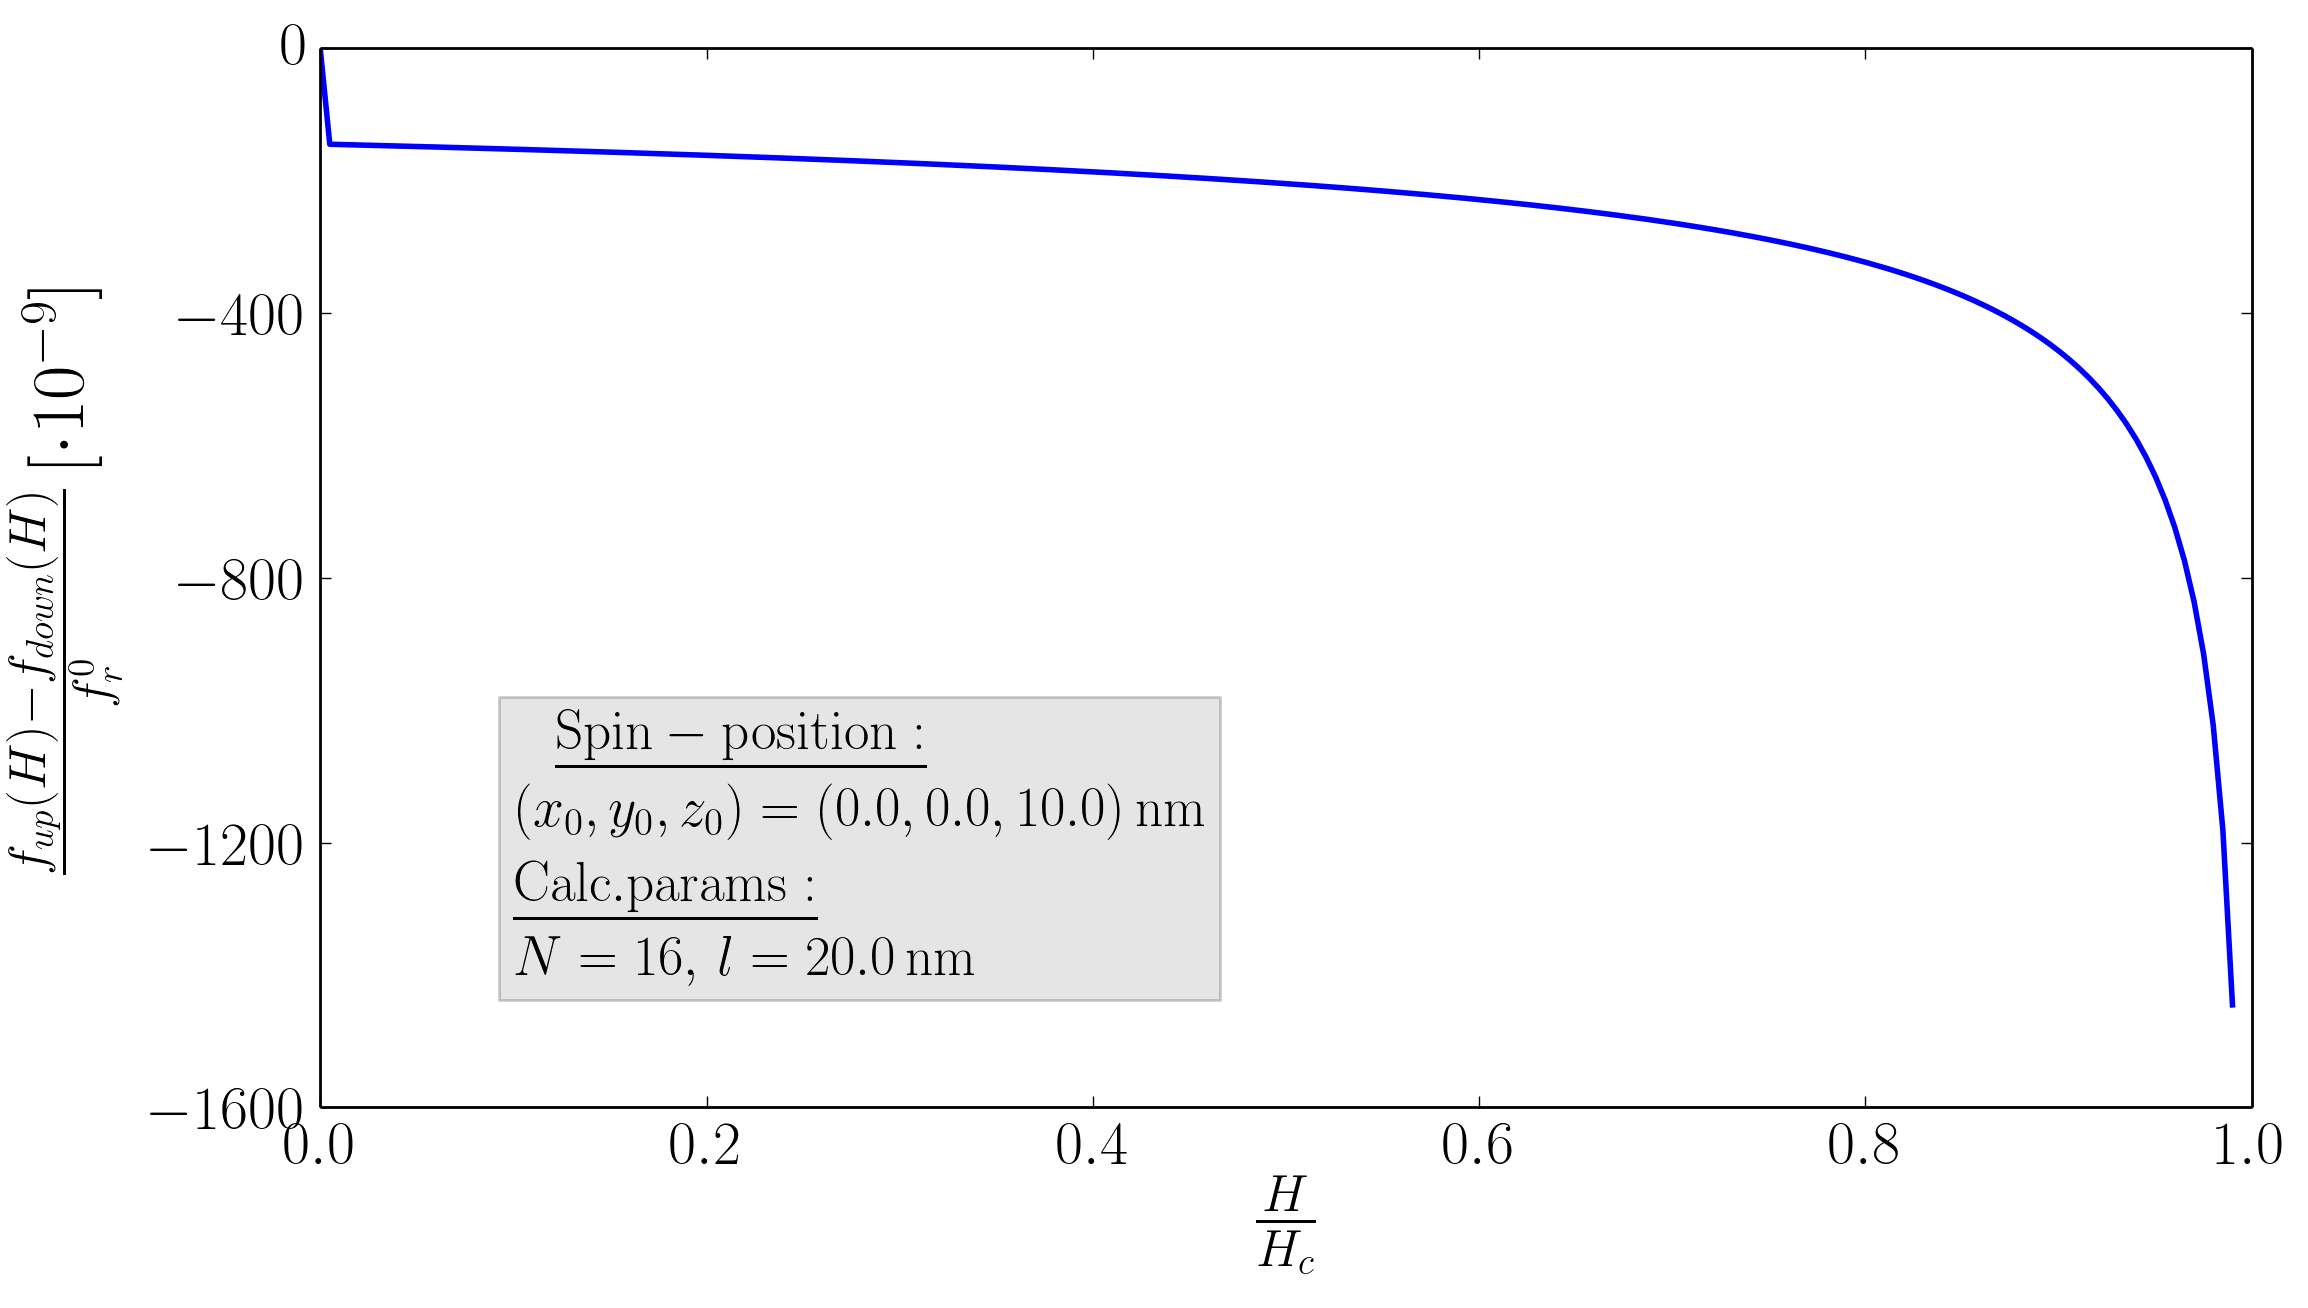

In [162]:
fig_deltaf, axes = plt.subplots(figsize=(12,7))
#plt.title(r'$\Delta f\,\mathrm{\,vs.\,magnetic\,field}$', fontsize = labelsize)
plt.plot(H_stat/H_c, deltaf*10**9, lw = 2., label = r'$(x_0,y_0,z_0) = ({},{},{}); A = ({}\,\mathrm{{nm}})^2$'.format(z*10**9, 0, 0, l*10**9))
plt.xlabel(r'$\frac{H}{H_c}$', fontsize = labelsize)
plt.ylabel(r'$\frac{f_{up}(H) - f_{down}(H)}{f_{r}^0}\,\mathrm{[\cdot 10^{-9}]}$', fontsize = labelsize)
#plt.xlim(0,0.1)
#plt.ylim(-300,0)
plt.yticks([-1600,-1200,-800,-400,0])
axes.text(0.1, -1400, r'$\mathrm{{\underline{{Spin-position:}}}} \\ \\ (x_0, y_0, z_0) = ({}, {}, {})\, \mathrm{{nm}} \\ \\ \mathrm{{\underline{{Calc. params:}}}} \\ \\N = {}, \, l = {}\,\mathrm{{nm}} \\$'.format(mu_pos[0]*10**9, mu_pos[1]*10**9, z*10**9, N, l*10**9), style='italic',
        bbox={'facecolor':'grey', 'alpha':0.2, 'pad':10}, fontsize = 20)
#plt.legend(loc = 'upper left', bbox_to_anchor = (1.0,1.0))
plt.tight_layout()

In [163]:
fig_deltaf.savefig('deltaf.png', dpi = 200, bbox_inches = 'tight')

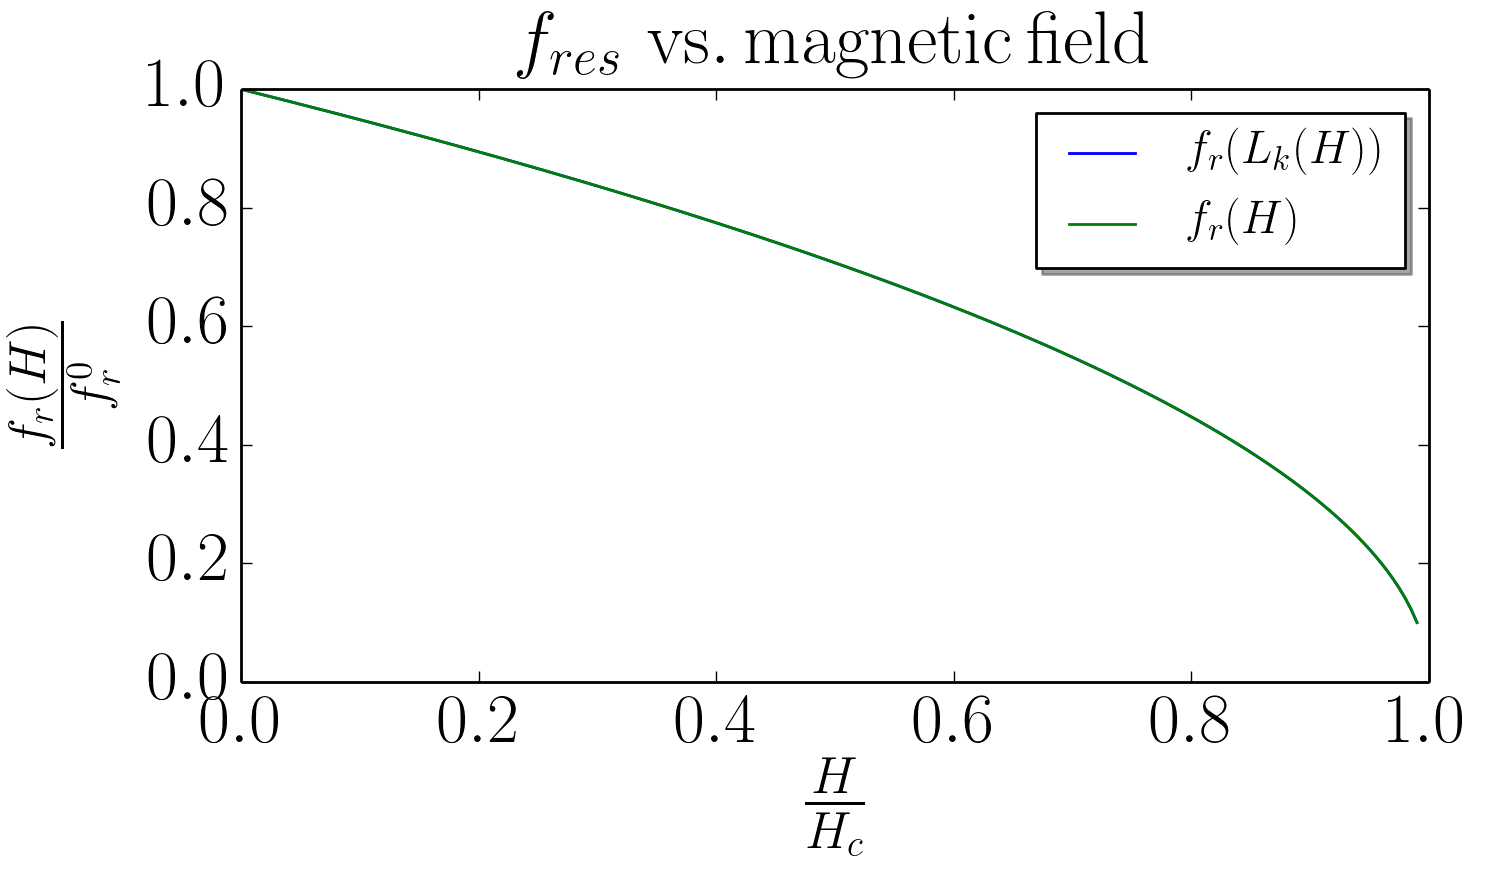

In [89]:

fig_fr, axes = plt.subplots(figsize = (8,5))
plt.title(r'$f_{res}\,\mathrm{\,vs.\,magnetic\,field}$', fontsize = labelsize)
plt.plot(H_stat/H_c, fr_0, label = r'$f_r(L_k (H))$')
plt.plot(H_stat/H_c, f_r(H_stat, H_c), label = r'$f_r(H)$')
plt.xlabel(r'$\frac{H}{H_c}$', fontsize = labelsize)
plt.ylabel(r'$\frac{f_{r}(H)}{f_{r}^{\mathregular{0}}}$', fontsize = labelsize)
plt.legend(fontsize = labelsize-10)
plt.ylim(0,1)
plt.tight_layout()

In [90]:
#fig_fr.savefig('fr_H.png', dpi = 200)

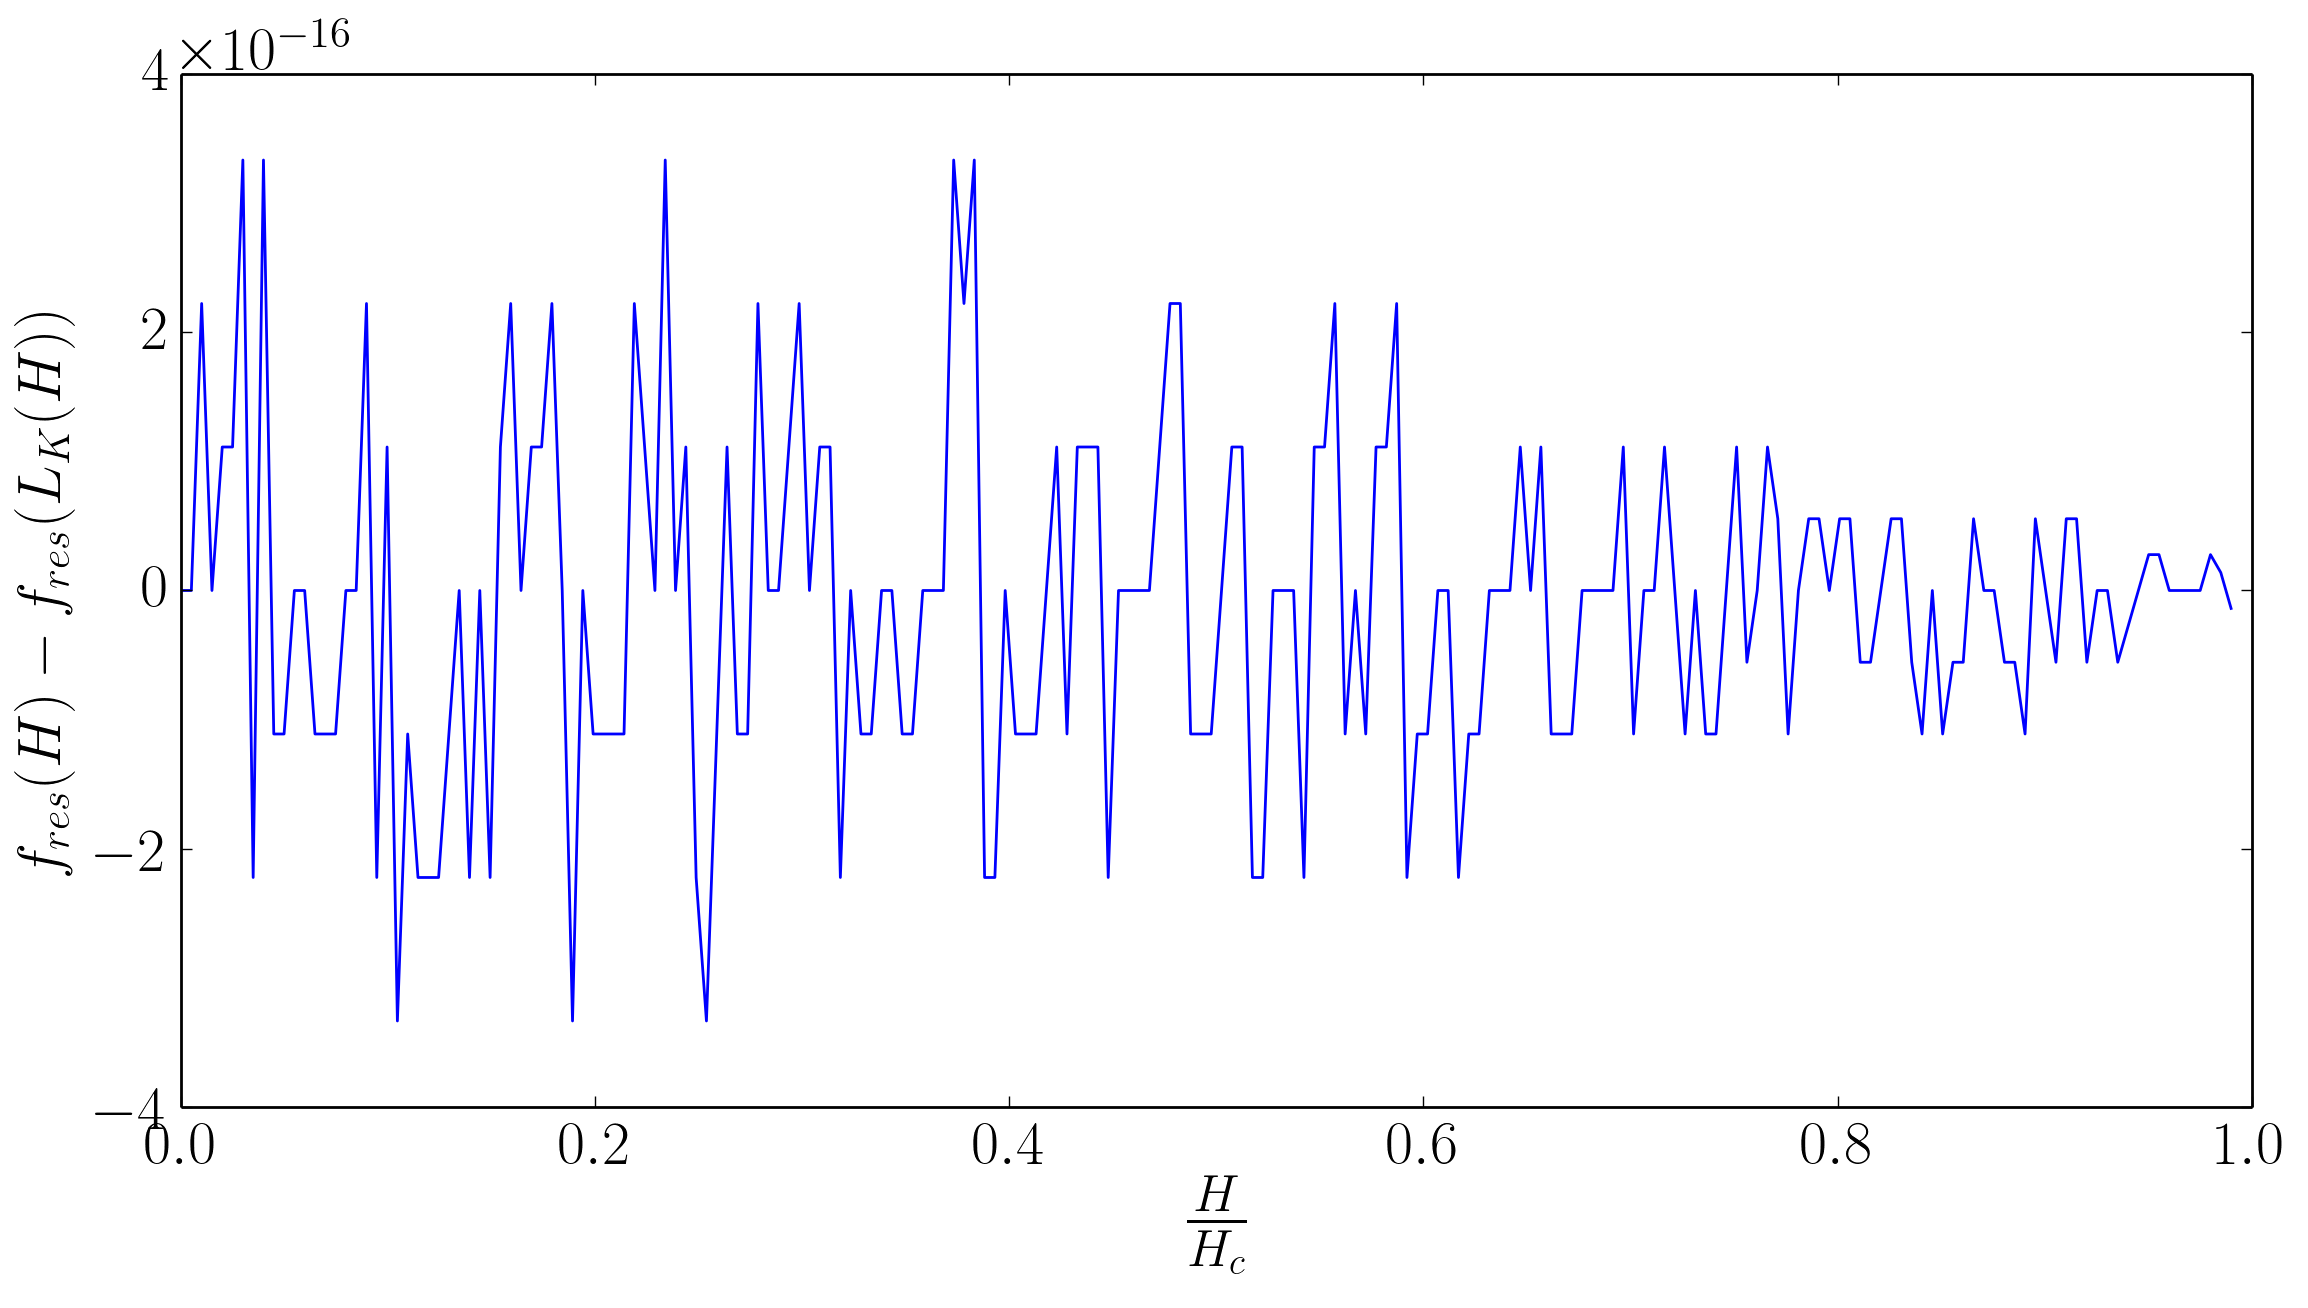

In [168]:
fig_dfH = plt.figure(figsize=(12,7))
plt.ylabel(r'$f_{res}(H) - f_{res}(L_K(H))$')
plt.plot(H_stat/H_c, fr_0-f_r(H_stat, H_c))
plt.xlabel(r'$\frac{H}{H_c}$', fontsize = labelsize)
plt.yticks([-4*10**-16,-2*10**-16,0,2*10**-16,4*10**-16])
plt.tight_layout()

In [169]:
fig_dfH.savefig('fr_(H)-fr_(L(H)).png')

In [93]:
def deltaL(N,H_stat, z, H_c):
    B_tot_vec = []
    for i in range(N):
        B = []
        for j in range(N):
            B.append(B_ij_vec(i,j, z, mu))
        B_tot_vec.append(B)    
    B_tot_vec = np.array(B_tot_vec)
    H_s = B_tot_vec/mu_0
    
    H_plus = np.array(H_3D(N,np.array(H_stat),np.array(H_s)))  #spin up
    H_minus = np.array(H_3D(N,np.array(H_stat),-np.array(H_s))) #spin down
    #kinetic inductance: spin up and spin down
    L_plus = np.array(L_tot_v(N,H_plus, H_c))
    L_minus = np.array(L_tot_v(N,H_minus, H_c))
    #kinetic inductance in homogeneous magnetic field
    #L_0 = L_tot_v(N,np.array(H_3D(N,H_stat,0)), H_c)
    dL = L_plus-L_minus
    
    return dL,L_plus, L_minus

## response for very small static magnetic fields (in the order of H_s)

In [94]:
H_small = np.linspace(0,2*np.max(H_tot_vec), 200)

In [95]:
z1 = 10*10**(-9)

In [96]:
dL = deltaL(N,H_small, z1, H_c)


In [97]:
dL2 = deltaL(N,H_small, 2.*z1, H_c)
dL3 = deltaL(N,H_small, 0.5*z1, H_c)

In [98]:
dL4 = deltaL(N,H_small, 0.1*z1, H_c)

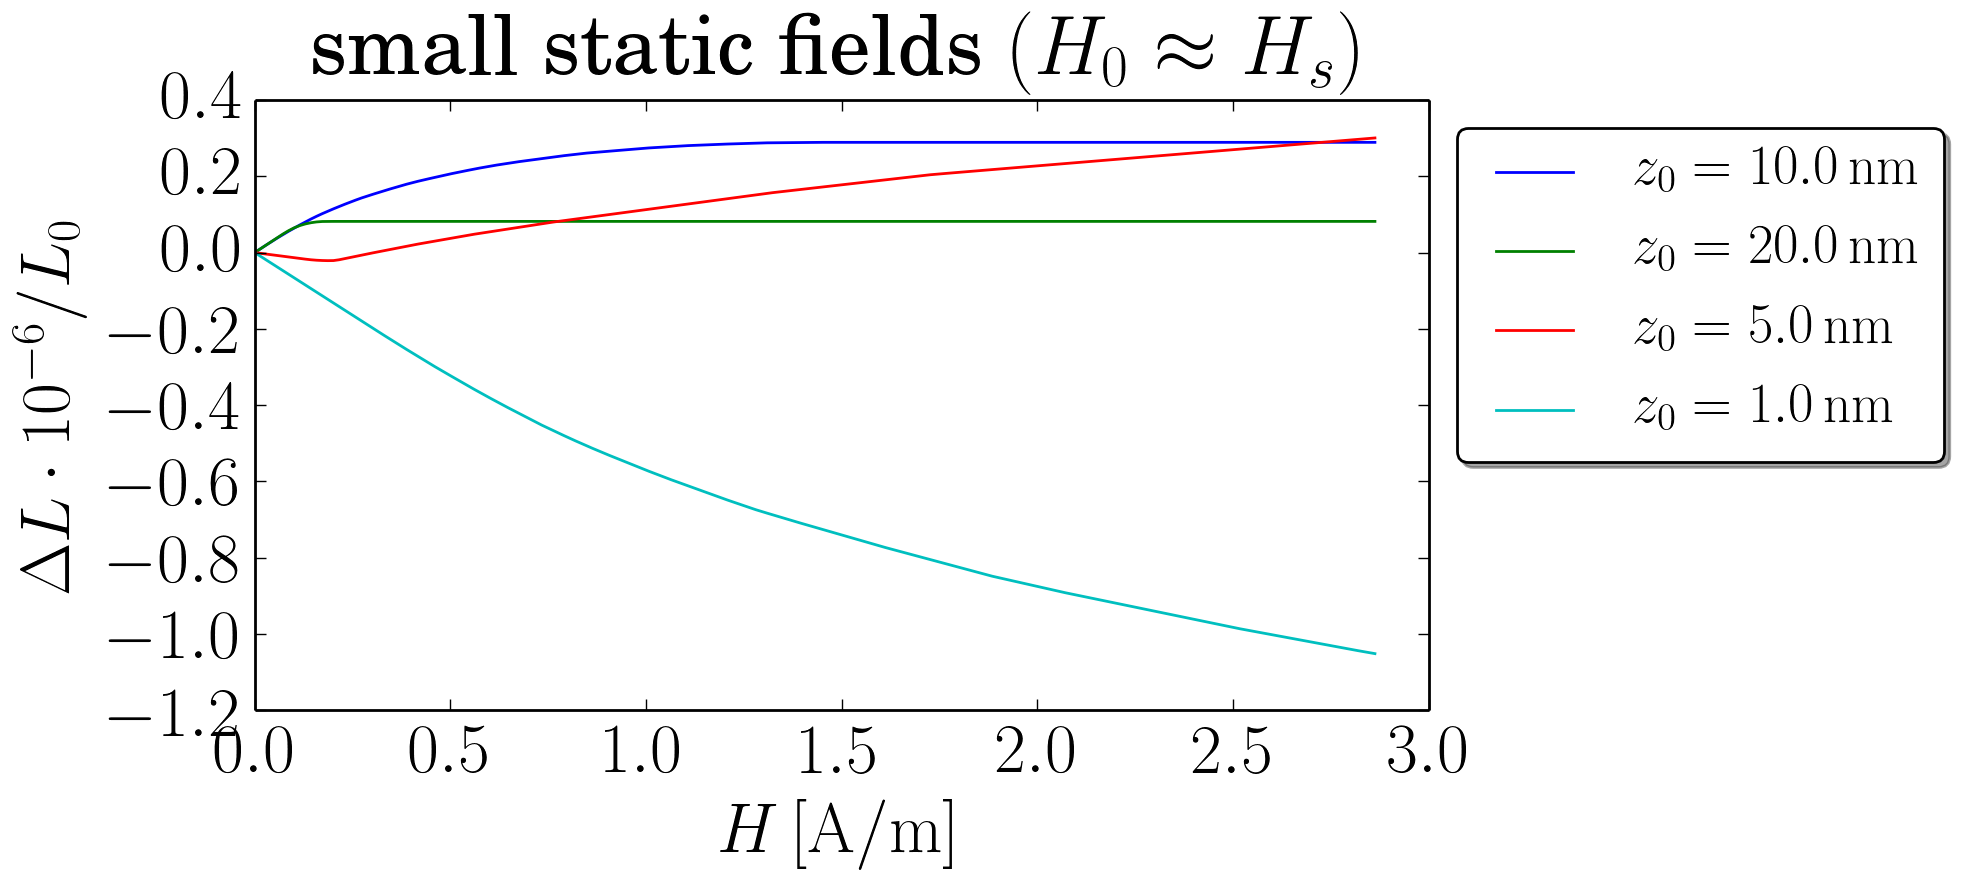

In [99]:
plt.subplots(figsize = (8,5))
plt.title(r'small static fields $(H_0 \approx H_s)$')
plt.plot(H_small, dL[0]*10**6, label = r'$z_0 = {} \mathrm{{\,nm}}$'.format(z1*10**9))
plt.plot(H_small, dL2[0]*10**6, label = r'$z_0 = {} \mathrm{{\,nm}}$'.format(2*z1*10**9))
plt.plot(H_small, dL3[0]*10**6, label = r'$z_0 = {} \mathrm{{\,nm}}$'.format(0.5*z1*10**9))
plt.plot(H_small, dL4[0]*10**6, label = r'$z_0 = {} \mathrm{{\,nm}}$'.format(0.1*z1*10**9))
#plt.axvline(np.abs(np.min(H_tot_vec)), color = 'red')
plt.xlabel(r'$H \mathrm{\,[A/m]}$')
plt.ylabel(r'$\Delta L \cdot 10^{-6} / L_0$')
#plt.axvline(np.max(H_tot_vec), color = 'red')
#plt.xlim(0,2)
plt.legend(fontsize = 20, loc = 'upper left', bbox_to_anchor = (1.0,1.0), fancybox = True)
plt.tight_layout()

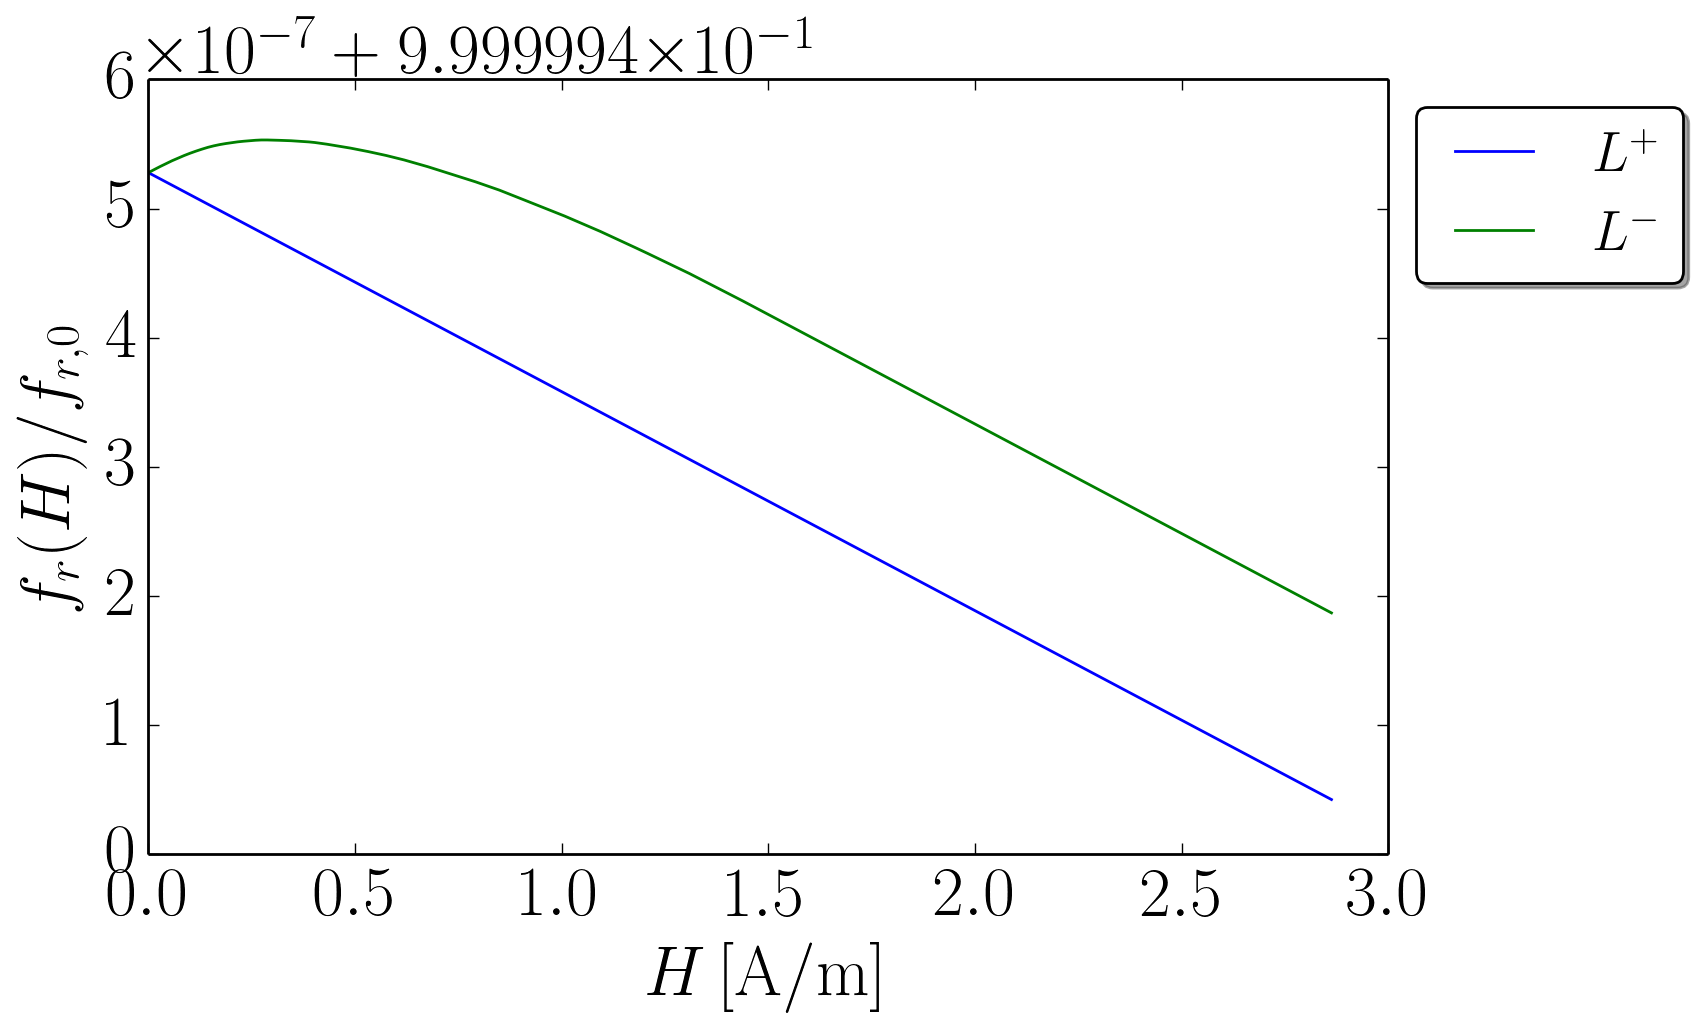

In [100]:
plt.subplots(figsize = (8,5))
plt.plot(H_small, f_rL(dL[1]), label = r'$L^+$')
plt.plot(H_small, f_rL(dL[2]), label = r'$L^-$')
#plt.plot(H_small/H_c, fr_minus)
#plt.xlim(0,0.1)
#plt.ylim(0.99999997,1.0)
plt.xlabel(r'$H \mathrm{\,[A/m]}$')
plt.ylabel(r'$f_r(H) / f_{r,0}$')
plt.legend(fontsize = 20, loc = 'upper left', bbox_to_anchor = (1.0,1.0), fancybox = True)

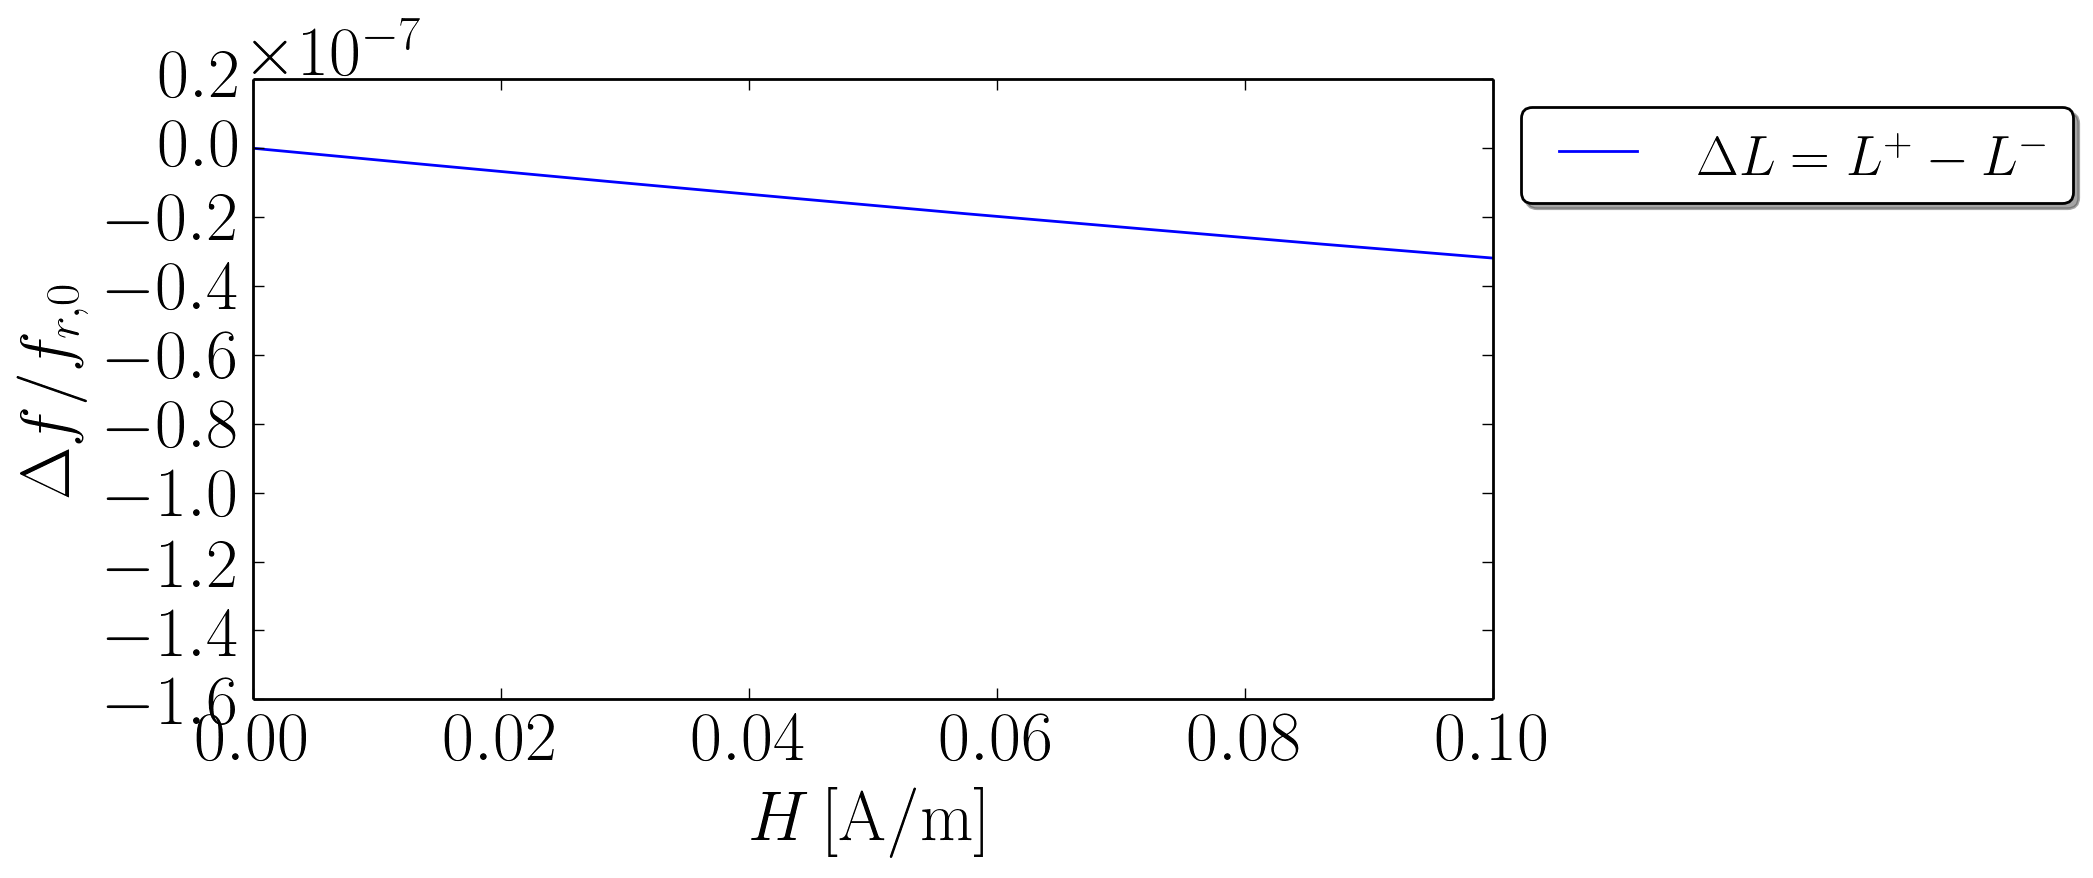

In [101]:
plt.subplots(figsize = (8,4))
plt.plot(H_small, f_rL(dL[1])-f_rL(dL[2]), label = r'$\Delta L = L^+-L^-$')
#plt.plot(H_small, f_rL(dL[2]), label = r'$L^-$')
plt.xlim(0,0.1)
#plt.ylim(0.99999999,1.0)
plt.xlabel(r'$H \mathrm{\,[A/m]}$')
plt.ylabel(r'$\Delta f / f_{r,0}$')
plt.legend(fontsize = 20, loc = 'upper left', bbox_to_anchor = (1.0,1.0), fancybox = True)

In [102]:
def df(N,H_stat, z, H_c):
    dL = deltaL(N,H_stat, z, H_c)
    L_plus = dL[1]
    L_minus = dL[2]    
    deltaf = f_rL(L_plus)-f_rL(L_minus)
    
    return deltaf

In [103]:
H_small1 = np.linspace(0,10**(-6)*H_c,200)

In [104]:
df1 = df(N,H_small1, z1, H_c)

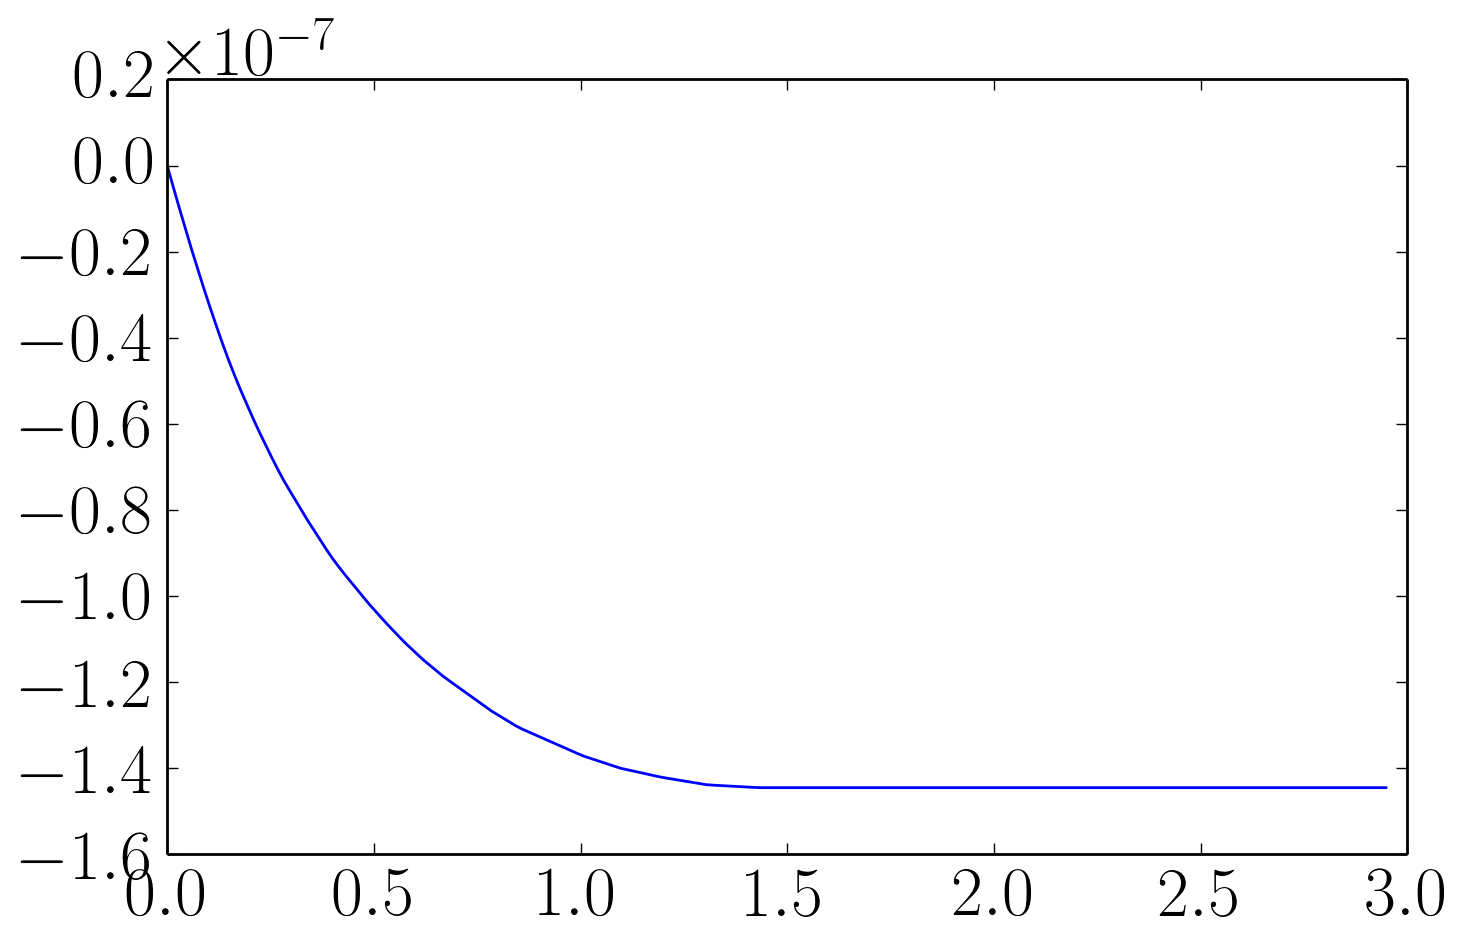

In [105]:
plt.plot(H_small1, df1)

# calculations for different spin positions

In [106]:
#initial position of the magnetic moment
mu_pos = np.array((0,0,0))*10**(-9)

In [107]:
def B_dz(x,y,z,mu_pos, mu):
    '''z component of the magnetic flux densitiy B of a magnetic moment mu'''
    
    (x_0,y_0,z_0) = mu_pos
    
    r = np.array([x-x_0,y-y_0,z-z_0])
    r_abs = np.linalg.norm(r)
    
    B_z = (3.*r[2]*np.dot(mu,r)/r_abs**(5.)-mu[2]/r_abs**(3.))  #calculates only z-component
    
    return mu_0/(4.*np.pi)*B_z
    

In [108]:
def B_ij(i,j, z,mu_pos, mu,N,l):
    '''averaged z component of the magnetic field for the square i(column) j(row)
    magnetic flux is calculated as the surface integral of the magnetic flux densitiy
    and divided by the area A of the element'''
    #boundary values:
    deltax = deltay = l/N
    
    x_low = -l/2. + (i)*deltax
    x_high = -l/2. + (i+1)*deltax
    y_low = -l/2. + (j)*deltax
    y_high = -l/2. + (j+1)*deltax
    
    B_mean = (1./A)*integrate.nquad(B_dz,[[x_low,x_high],[y_low,y_high]], args=(z,mu_pos,mu))[0] 
    return B_mean

In [109]:
B_ij(1,1,z,mu_pos,mu, N, l)

7.762028020432043e-08

In [110]:
def B_s(N,l,z,mu_pos,mu):
    '''magnetic field, spin'''
    B_tot = []
    for i in range(N):
        B = []
        for j in range(N):
            B.append(B_ij(i,j, z,mu_pos, mu, N, l))
        B_tot.append(B)    
    B_tot = np.array(B_tot)
    return B_tot

In [111]:
def L_tot(N,H, H_c):
    '''total inductance'''
    L_t = []
    #p1 = pb(len(H))
    l_tot = 0
    L_total = 0.
    for j in range(N): #sum over column (y-direction)
        L_row = 0.
        for i in range(N):  #sum over row (x-direction)
                L_row += L_kin(H, H_c)[i][j]
        l_tot += 1./L_row
    L_total = 1./l_tot
    L_t.append(L_total)
    #p1.iterate()
    return L_t

In [112]:
def L(N,l,z,mu_pos,mu, H0,H_c, up = True):
    '''kinetic inductance as a function of
    - spin-position: mu_pos
    - magnetic moment: mu
    - static magnetic field: H0
    - critical field: H_c'''
    H_s = np.array(B_s(N,l,z,mu_pos,mu)/mu_0)  #H-field, spin
    if up == True:   #spin up
        H_tot = H0+H_s
    else:            #spin down
        H_tot = H0-H_s
    L = L_tot(N,H_tot, H_c)  #total kinetic inductance
    return L

    

In [113]:
def f(N,l,z,mu_pos, mu, H0, H_c):
    '''resonance frequency as a function of 
    - spin-position: mu_pos
    - magnetic moment: mu
    - static magnetic field: H0
    - critical field: H_c'''
    
    #case distinction: z as integer value vs. array 
    if ((type(z) is int) == True):
        L1 = L(N,l,z,mu_pos,mu, H0,H_c)
        return f_rL(L1)
    else:
        fr = []
        pb1 = pb(len(z))
        for z_count in z:   #loop over every z value
            fr.append(f_rL(L(N,l,z_count,mu_pos, mu, H0, H_c)))
            pb1.iterate()
            
        return np.array(fr)
        
    

In [114]:
#array with different z values
z_test = np.linspace(1,80,30)*10**(-9)

In [115]:
-mu

array([ -0.00000000e+00,  -0.00000000e+00,  -9.27400968e-24])

In [116]:
H0 = 0.01*H_c
H01 = 0.1*H_c
H02 = 0.001*H_c

In [117]:
deltaf_z = np.array(f(N,l,z_test,mu_pos, mu, H0, H_c)-f(N,l,z_test,mu_pos, -mu, H0, H_c))

In [118]:
deltaf_z2 = np.array(f(N,l,z_test,mu_pos, mu, H01, H_c)-f(N,l,z_test,mu_pos, -mu, H01, H_c))

In [119]:
deltaf_z3 = np.array(f(N,l,z_test,mu_pos, mu, H02, H_c)-f(N,l,z_test,mu_pos, -mu, H02, H_c))

NameError: name 'fig_z2_H0' is not defined

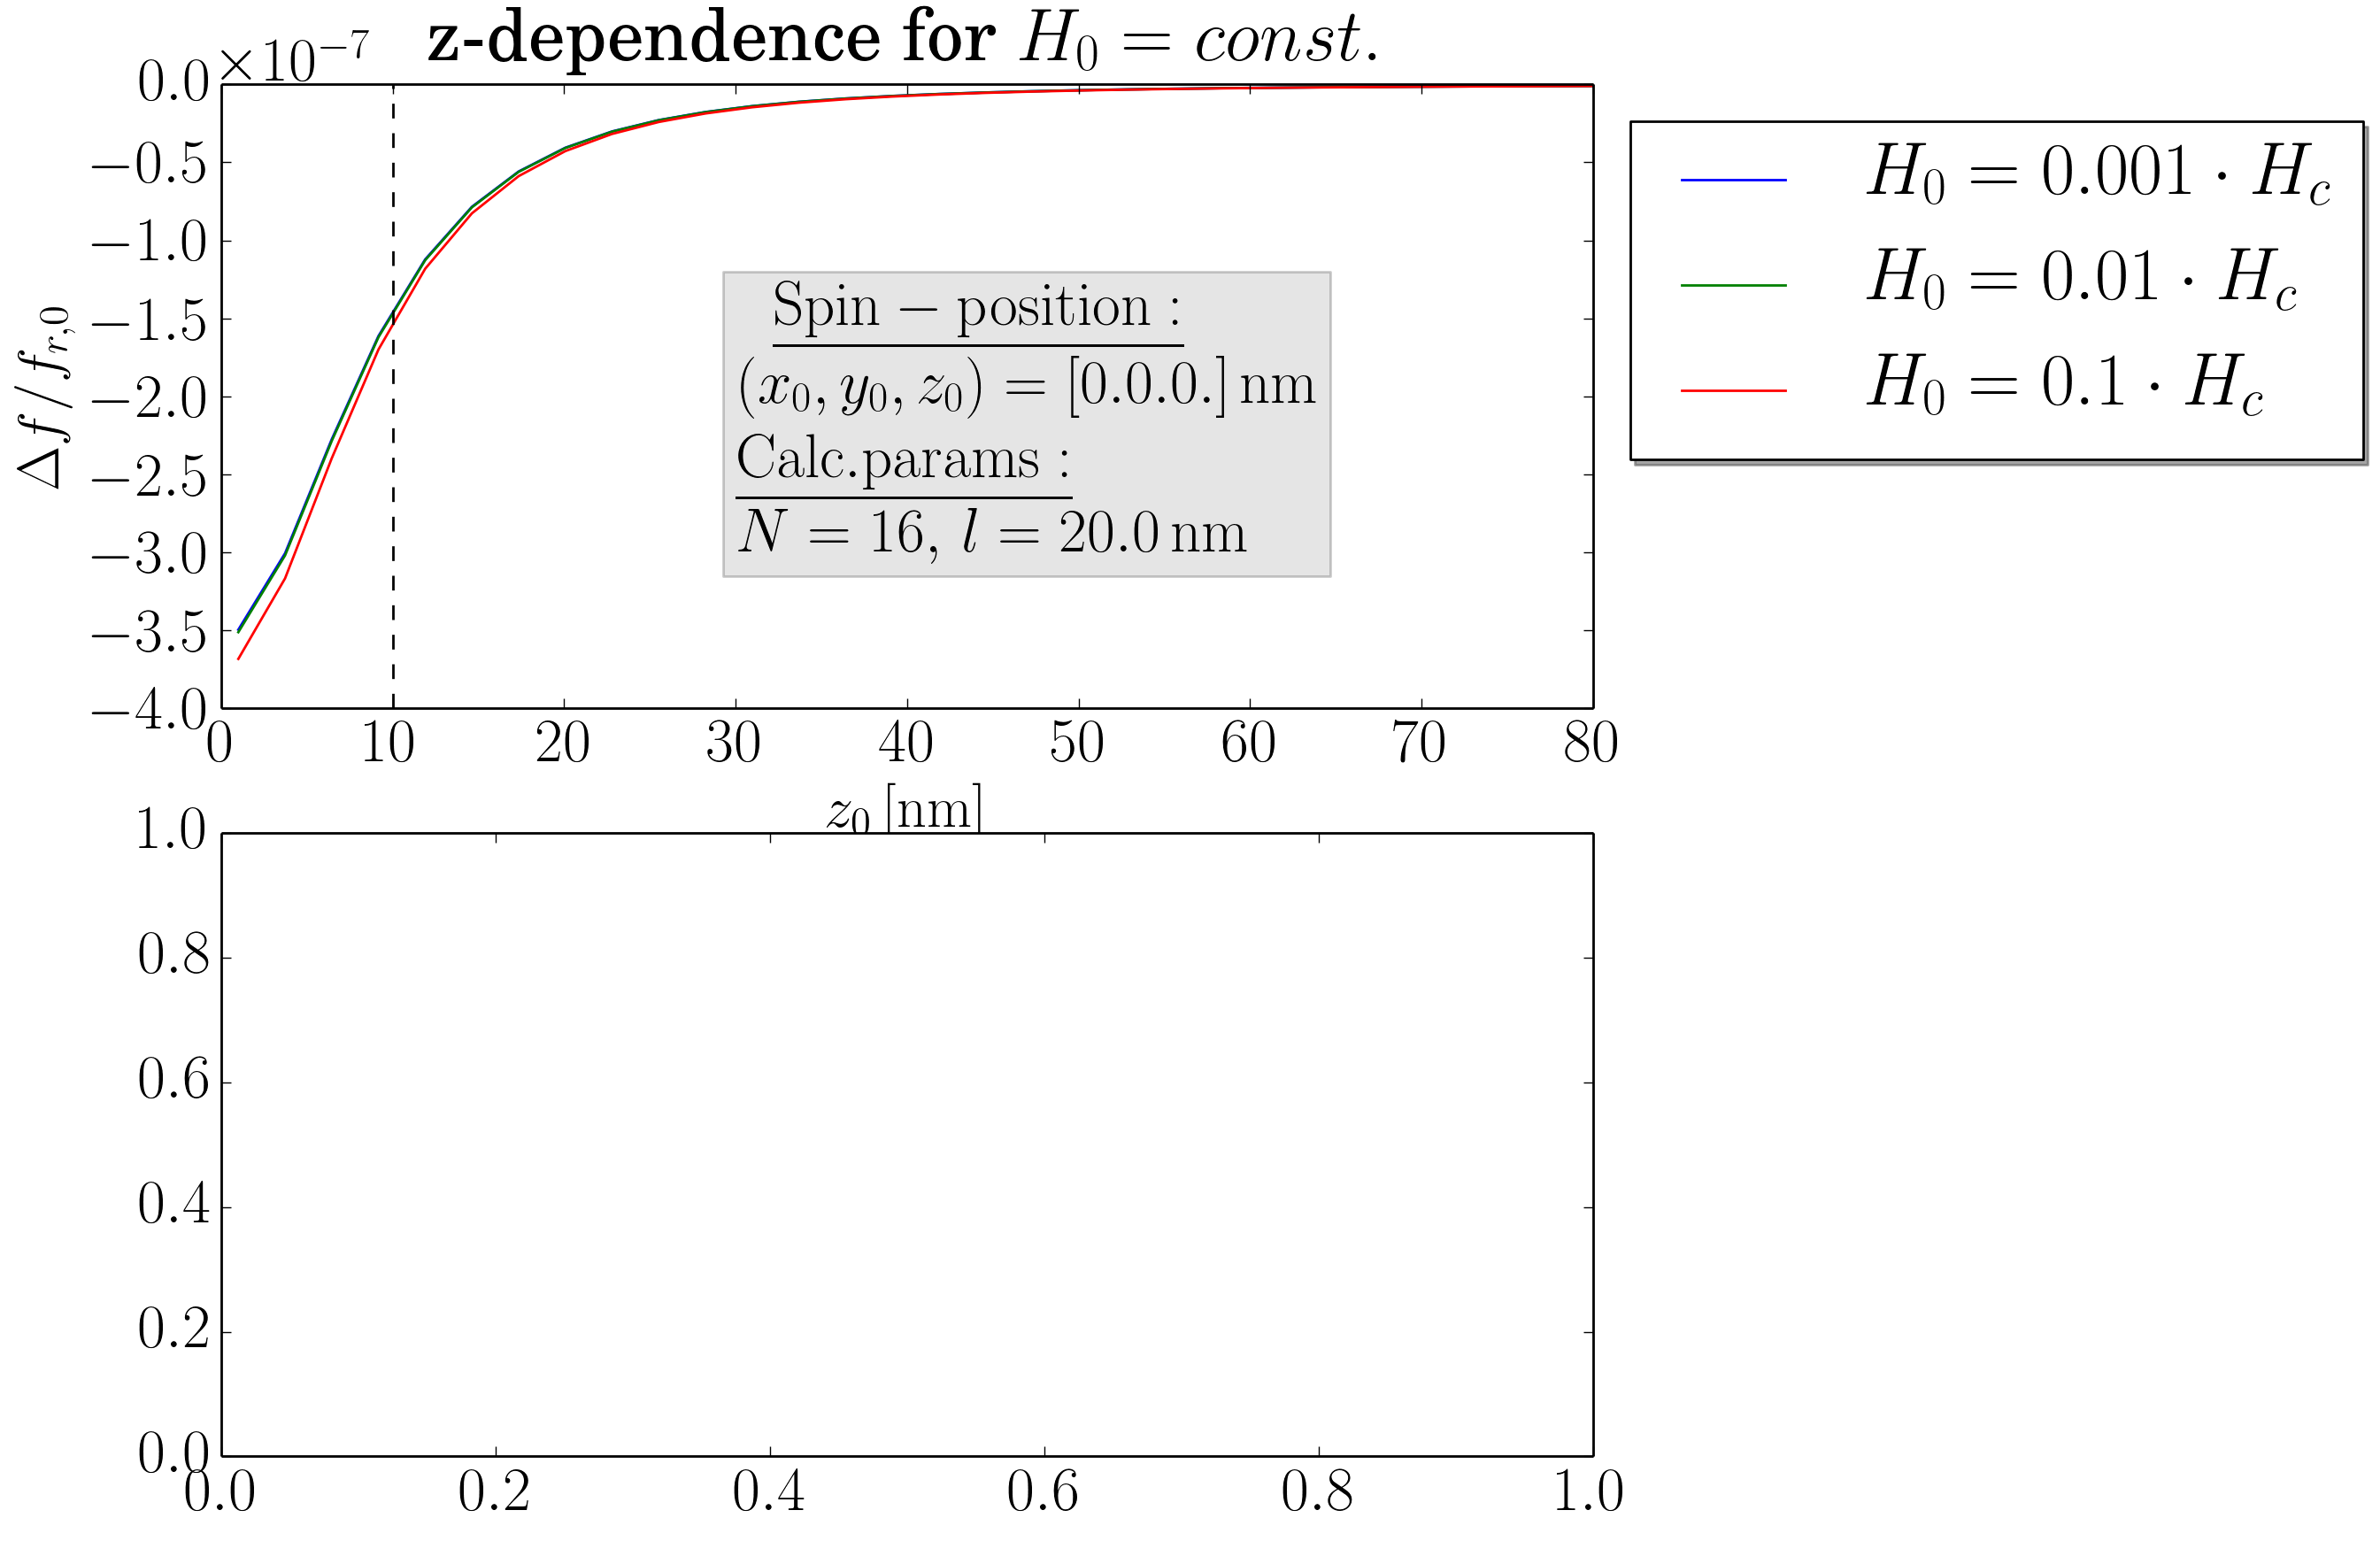

In [120]:
fig_z_H0 = plt.figure(figsize=(10,10))

axes = plt.subplot(211)
plt.plot(z_test*10**9,  deltaf_z3, label = r'$H_0 = {} \cdot H_c$'.format(H02/H_c))
plt.plot(z_test*10**9,  deltaf_z, label = r'$H_0 = {} \cdot H_c$'.format(H0/H_c))
plt.plot(z_test*10**9,  deltaf_z2, label = r'$H_0 = {} \cdot H_c$'.format(H01/H_c))
plt.axvline(z*10**9, color = 'black', ls = '--')
plt.title(r'z-dependence for $H_0 = const.$')
plt.xlabel(r'$z_0\,\mathrm{[nm]}$', fontsize = labelsize-3)
plt.ylabel(r'$\Delta f  / f_{r,0}$', fontsize = labelsize-3)
plt.legend(loc = 'upper left', bbox_to_anchor = (1.0,1.0))
#plt.ylim(-4*10**(-7),0)
axes.text(30, -3*10**(-7), r'$\mathrm{{\underline{{Spin-position:}}}} \\ \\ (x_0, y_0, z_0) = {}\, \mathrm{{nm}} \\ \\ \mathrm{{\underline{{Calc. params:}}}} \\ \\N = {}, \, l = {}\,\mathrm{{nm}} \\$'.format(mu_pos, N, l*10**9), style='italic',
        bbox={'facecolor':'grey', 'alpha':0.2, 'pad':10})


axes2 = plt.subplot(212)
fig_z2_H0.subplots_adjust(top=1.2)
axes2.set_title(r'$B_s^z$ (Spin)')
CD = plt.pcolor(x_small*10**9, y_small*10**9, B_s(N,l,z,mu_pos,mu), cmap = plt.get_cmap(cmaps.viridis))
axes2.set_aspect('equal') 
axes2.set_xlim(-l/2*10**9, l/2*10**9)
axes2.set_ylim(-l/2*10**9, l/2*10**9)
cbar = plt.colorbar(CD)
cbar.ax.set_ylabel(r'$B_s$')
axes2.set_xlabel('x [nm]')
axes2.set_ylabel('y [nm]')
axes2.text(-25, 10, r'$z = {}\,\mathrm{{nm}}$'.format(z*10**9))



plt.tight_layout()

In [ ]:
fig_z_H0.savefig('deltaf_z_H0.png', bbox_inches = 'tight')

In [ ]:
print deltaf_z2[3]
print deltaf[19]

In [ ]:
np.where(np.around(H_stat/H_c, 3) == 0.11)

In [ ]:
mu_pos1 = np.array([10,10,0])*10**(-9)

In [ ]:
df_z_Mu1 = np.array(f(N,l,z_test,mu_pos1, mu, H0, H_c)-f(N,l,z_test,mu_pos1, -mu, H0, H_c))
df_z2_Mu1 = np.array(f(N,l,z_test,mu_pos1, mu, H01, H_c)-f(N,l,z_test,mu_pos1, -mu, H01, H_c))
df_z3_Mu1 = np.array(f(N,l,z_test,mu_pos1, mu, H02, H_c)-f(N,l,z_test,mu_pos1, -mu, H02, H_c))

In [ ]:
fig_z1_H0 =  plt.figure(figsize=(10,10))


axes = plt.subplot(211)
plt.plot(z_test*10**9,  df_z3_Mu1, label = r'$H_0 = {} \cdot H_c$'.format(H02/H_c))
plt.plot(z_test*10**9,  df_z_Mu1, label = r'$H_0 = {} \cdot H_c$'.format(H0/H_c))
plt.plot(z_test*10**9,  df_z2_Mu1, label = r'$H_0 = {} \cdot H_c$'.format(H01/H_c))
plt.axvline(z*10**9, color = 'black', ls = '--')
plt.title(r'z-dependence for $H_0 $= const.')
plt.xlabel(r'$z_0\,\mathrm{[nm]}$', fontsize = labelsize-3)
plt.ylabel(r'$\Delta f  / f_{r,0}$', fontsize = labelsize-3)
plt.legend(loc = 'upper left', bbox_to_anchor = (1.0,1.0))
axes.text(30, -4*10**(-8), r'$\mathrm{{\underline{{Spin-position:}}}} \\ \\ (x_0, y_0, z_0) = ({}, {}, {})\, \mathrm{{nm}} \\ \\ \mathrm{{\underline{{Calc. params:}}}} \\ \\N = {}, \, l = {}\,\mathrm{{nm}} \\$'.format(mu_pos1[0]*10**9, mu_pos1[1]*10**9, mu_pos1[2]*10**9, N, l*10**9), style='italic',
        bbox={'facecolor':'grey', 'alpha':0.2, 'pad':10})
plt.tight_layout()
#plt.ylim(-4*10**(-7),0)

axes2 = plt.subplot(212)
fig_z2_H0.subplots_adjust(top=1.2)
axes2.set_title(r'$B_s^z$ (Spin)')
CD = plt.pcolor(x_small*10**9, y_small*10**9, B_s(N,l,z,mu_pos1,mu), cmap = plt.get_cmap(cmaps.viridis))
axes2.set_aspect('equal') 
axes2.set_xlim(-l/2*10**9, l/2*10**9)
axes2.set_ylim(-l/2*10**9, l/2*10**9)
cbar = plt.colorbar(CD)
cbar.ax.set_ylabel(r'$B_s$')
axes2.set_xlabel('x [nm]')
axes2.set_ylabel('y [nm]')
axes2.text(-25, 10, r'$z = {}\,\mathrm{{nm}}$'.format(z*10**9))



plt.tight_layout()



In [ ]:
fig_z1_H0.savefig('deltaf_z1_H0.png')

In [ ]:
mu_pos2 = np.array([30,30,0])*10**(-9)

In [ ]:
df_z_Mu2 = np.array(f(N,l,z_test,mu_pos2, mu, H0, H_c)-f(N,l,z_test,mu_pos2, -mu, H0, H_c))
df_z2_Mu2 = np.array(f(N,l,z_test,mu_pos2, mu, H01, H_c)-f(N,l,z_test,mu_pos2, -mu, H01, H_c))
df_z3_Mu2 = np.array(f(N,l,z_test,mu_pos2, mu, H02, H_c)-f(N,l,z_test,mu_pos2, -mu, H02, H_c))

In [ ]:
fig_z2_H0, axes = plt.subplots()
plt.plot(z_test*10**9,  df_z3_Mu2, label = r'$H_0 = {} \cdot H_c$'.format(H02/H_c))
plt.plot(z_test*10**9,  df_z_Mu2, label = r'$H_0 = {} \cdot H_c$'.format(H0/H_c))
plt.plot(z_test*10**9,  df_z2_Mu2, label = r'$H_0 = {} \cdot H_c$'.format(H01/H_c))
plt.title(r'z-dependence for $H_0 $= const.')
plt.xlabel(r'$z_0\,\mathrm{[nm]}$', fontsize = labelsize-3)
plt.ylabel(r'$\Delta f  / f_{r,0}$', fontsize = labelsize-3)
plt.legend(loc = 'upper left', bbox_to_anchor = (1.0,1.0))
axes.text(30, 1*10**(-9), r'$\mathrm{{\underline{{Spin-position:}}}} \\ \\ (x_0, y_0, z_0) = ({}, {}, {})\, \mathrm{{nm}} \\ \\ \mathrm{{\underline{{Calc. params:}}}} \\ \\N = {}, \, l = {}\,\mathrm{{nm}} \\$'.format(mu_pos2[0]*10**9, mu_pos2[1]*10**9, mu_pos2[2]*10**9, N, l*10**9), style='italic',
        bbox={'facecolor':'grey', 'alpha':0.2, 'pad':10})
plt.tight_layout()
#plt.ylim(-4*10**(-7),0)




In [ ]:
mu_pos3 = np.array([20,20,0])*10**(-9)

In [ ]:
df_z_Mu3 = np.array(f(N,l,z_test,mu_pos3, mu, H0, H_c)-f(N,l,z_test,mu_pos3, -mu, H0, H_c))
df_z2_Mu3 = np.array(f(N,l,z_test,mu_pos3, mu, H01, H_c)-f(N,l,z_test,mu_pos3, -mu, H01, H_c))
df_z3_Mu3 = np.array(f(N,l,z_test,mu_pos3, mu, H02, H_c)-f(N,l,z_test,mu_pos3, -mu, H02, H_c))

In [ ]:
fig_z2_H0, axes = plt.subplots()
plt.plot(z_test*10**9,  df_z3_Mu3, label = r'$H_0 = {} \cdot H_c$'.format(H02/H_c))
plt.plot(z_test*10**9,  df_z_Mu3, label = r'$H_0 = {} \cdot H_c$'.format(H0/H_c))
plt.plot(z_test*10**9,  df_z2_Mu3, label = r'$H_0 = {} \cdot H_c$'.format(H01/H_c))
plt.title(r'z-dependence for $H_0 $= const.')
plt.xlabel(r'$z_0\,\mathrm{[nm]}$', fontsize = labelsize-3)
plt.ylabel(r'$\Delta f  / f_{r,0}$', fontsize = labelsize-3)
plt.legend(loc = 'upper left', bbox_to_anchor = (1.0,1.0))
axes.text(30, 1*10**(-9), r'$\mathrm{{\underline{{Spin-position:}}}} \\ \\ (x_0, y_0, z_0) = ({}, {}, {})\, \mathrm{{nm}} \\ \\ \mathrm{{\underline{{Calc. params:}}}} \\ \\N = {}, \, l = {}\,\mathrm{{nm}} \\$'.format(mu_pos3[0]*10**9, mu_pos3[1]*10**9, mu_pos3[2]*10**9, N, l*10**9), style='italic',
        bbox={'facecolor':'grey', 'alpha':0.2, 'pad':10})
plt.tight_layout()
#plt.ylim(-4*10**(-7),0)

In [ ]:
fig_z2_H0 = plt.figure(figsize=(10,10))
#fig_z2_H0.tight_layout()

axes = plt.subplot(211)
plt.plot(z_test*10**9,  df_z3_Mu3, label = r'$H_0 = {} \cdot H_c$'.format(H02/H_c))
plt.plot(z_test*10**9,  df_z_Mu3, label = r'$H_0 = {} \cdot H_c$'.format(H0/H_c))
plt.plot(z_test*10**9,  df_z2_Mu3, label = r'$H_0 = {} \cdot H_c$'.format(H01/H_c))
plt.axvline(z*10**9, color = 'black', ls = '--')
plt.title(r'z-dependence for $H_0 $= const.')
plt.xlabel(r'$z_0\,\mathrm{[nm]}$', fontsize = labelsize-3)
plt.ylabel(r'$\Delta f  / f_{r,0}$', fontsize = labelsize-3)
plt.legend(loc = 'upper left', bbox_to_anchor = (1.0,1.0))
axes.text(30, 1*10**(-9), r'$\mathrm{{\underline{{Spin-position:}}}} \\ \\ (x_0, y_0, z_0) = ({}, {}, {})\, \mathrm{{nm}} \\ \\ \mathrm{{\underline{{Calc. params:}}}} \\ \\N = {}, \, l = {}\,\mathrm{{nm}} \\$'.format(mu_pos3[0]*10**9, mu_pos3[1]*10**9, mu_pos3[2]*10**9, N, l*10**9), style='italic',
        bbox={'facecolor':'grey', 'alpha':0.2, 'pad':10})
plt.tight_layout()
#plt.ylim(-4*10**(-7),0)


axes2 = plt.subplot(212)
fig_z2_H0.subplots_adjust(top=1.2)
axes2.set_title(r'$B_s^z$ (Spin)')
CD = plt.pcolor(x_small*10**9, y_small*10**9, B_s(N,l,z,mu_pos3,mu), cmap = plt.get_cmap(cmaps.viridis))
axes2.set_aspect('equal') 
axes2.set_xlim(-l/2*10**9, l/2*10**9)
axes2.set_ylim(-l/2*10**9, l/2*10**9)
cbar = plt.colorbar(CD)
cbar.ax.set_ylabel(r'$B_s$')
axes2.set_xlabel('x [nm]')
axes2.set_ylabel('y [nm]')
axes2.text(-25, 10, r'$z = {}\,\mathrm{{nm}}$'.format(z*10**9))



plt.tight_layout()



In [ ]:
fig_z2_H0.savefig('deltaf_z2_H0.png')